# House Price Prediction Model

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.0 MB/s 
     |████████████████████████████████| 6.3 MB 25.9 MB/s 
     |████████████████████████████████| 16.7 MB 334 kB/s 


In [3]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 6.8 MB 36.2 MB/s 
     |████████████████████████████████| 167 kB 36.2 MB/s 
     |████████████████████████████████| 1.7 MB 30.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 33.3 MB/s 
     |████████████████████████████████| 2.0 MB 15.0 MB/s 
     |████████████████████████████████| 262 kB 39.4 MB/s 
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 125 kB 11.1 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 17.9 MB 9.3 MB/s 
     |████████████████████████████████| 10.4 MB 19.9 MB/s 
     |████████████████████████████████| 

In [4]:
pip install markupsafe==2.0.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


## Problem statement

Sale of a house depend on various factors like Total area,number of rooms,property condition,quality, etc.

For a seller, determining the optimum selling price is important.

Predicting house prices can help to determine the selling price of a house of a particular region and can help people to find the right time to buy a home

We will try to estimate the price range for a given house using given feature information. These details are collected from various sources

## Attribute Information

**FEATURES**
1. `cid` : This is the unique ID of the house
1. `dayhours` : This was the Sold date of the house
1. `price` : This is the Prediction variable of our target class
1. `room_bed` : This denotes  the Number of bedrooms available in the house
1. `room_bath` : This denotes  the Number of bathrooms available in the house
1. `living_measure` : This denotes the square feet of the house only includes the area inside the buiding that is occupiable
1. `lot_measure` : This denotes the lot areas like parking,drive way, balcony that do not have solid cover
1. `ceil` : This Denotes number of levels /floors available in the house
1. `coast` : This Denotes if the house has a coastal/water view
1. `sight` : This Denotes how many members Has been viewed
1. `condition` : This denotes the overall condition of the house
1. `quality` : This implies grade/Rating given to the housing unit, based on grading system
1. `ceil_measure` : This Denotes square footage of house apart from basement
1. `basement_measure` : This Denotes square footage of the  basement
1. `yr_built` : Which year the house was built
1. `yr_renovated` : Which year the house was renovated
1. `zipcode` : Zip
1. `lat` : Latitude coordinate
1. `long` : Longitudinal coordinate
1. `living_measure15` :  Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
1. `lot_measure15` : lotSize area in 2015(implies-- some renovations)
1.  `furnished` : Denotes whether fully furnished or semi furnished
1. `total_area`: Denotes sum of both  both living and lot area
**TARGET VARIABLE**<br>
`price` : This is the **target variable** 

## Import Libraries


In [5]:

# Basic libs

import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from datetime import datetime
from google.colab import drive
import os

#For geographic visual
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Display libs

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.options.display.float_format = '{:.5f}'.format


# Modelling libs

from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function
from sklearn import preprocessing
import jinja2
from pycaret.regression import *
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Save model

import pickle




/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [6]:
open('/content/drive/My Drive/Colab Notebooks/Capstone GL/uszips.csv').read()


"zipcode,city,county_name\n601,Adjuntas,Adjuntas\n602,Aguada,Aguada\n603,Aguadilla,Aguadilla\n606,Maricao,Maricao\n610,Anasco,Añasco\n611,Angeles,Utuado\n612,Arecibo,Arecibo\n616,Bajadero,Arecibo\n617,Barceloneta,Barceloneta\n622,Boqueron,Cabo Rojo\n623,Cabo Rojo,Cabo Rojo\n624,Penuelas,Peñuelas\n627,Camuy,Camuy\n631,Castaner,Lares\n636,Rosario,San Germán\n637,Sabana Grande,Sabana Grande\n638,Ciales,Ciales\n641,Utuado,Utuado\n646,Dorado,Dorado\n647,Ensenada,Guánica\n650,Florida,Florida\n652,Garrochales,Arecibo\n653,Guanica,Guánica\n656,Guayanilla,Guayanilla\n659,Hatillo,Hatillo\n660,Hormigueros,Hormigueros\n662,Isabela,Isabela\n664,Jayuya,Jayuya\n667,Lajas,Lajas\n669,Lares,Lares\n670,Las Marias,Las Marías\n674,Manati,Manatí\n676,Moca,Moca\n677,Rincon,Rincón\n678,Quebradillas,Quebradillas\n680,Mayaguez,Mayagüez\n682,Mayaguez,Mayagüez\n683,San German,San Germán\n685,San Sebastian,San Sebastián\n687,Morovis,Morovis\n688,Sabana Hoyos,Arecibo\n690,San Antonio,Aguadilla\n692,Vega Alta,Vega A

# Loading  the data

In [7]:
# Loading the dataset and printing the top 10 rows of the dataset

Dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone GL/innercity.csv')
Dataset.head(10)

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25000,3020,13457,1.00000,0,0,5,9,3020,0,1956,0,98133,47.71740,-122.33600,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50000,2550,7500,1.00000,0,0,3,8,1750,800,1976,0,98023,47.31650,-122.38600,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50000,2370,4324,2.00000,0,0,3,8,2370,0,2006,0,98038,47.35150,-121.99900,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00000,820,3844,1.00000,0,0,4,6,820,0,1916,0,98133,47.70490,-122.34900,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50000,1400,4050,1.00000,0,0,4,8,1400,0,1954,0,98115,47.67680,-122.26900,1900,5940,0,5450
5,5525400430,20140715T000000,585000,3,2.50000,2050,11690,2.00000,0,0,4,9,2050,0,1989,0,98059,47.52790,-122.16100,2410,10172,1,13740
6,2419600075,20141201T000000,465000,3,1.75000,1480,6360,1.00000,0,0,3,7,1480,0,1954,0,98133,47.73110,-122.35300,1480,6360,0,7840
7,114101161,20140829T000000,480000,3,1.50000,2100,67269,1.00000,0,0,4,7,1220,880,1949,0,98028,47.75920,-122.23000,1610,15999,0,69369
8,7011201550,20140707T000000,780000,4,2.00000,2600,4800,1.00000,0,2,3,8,1400,1200,1953,0,98119,47.63700,-122.37100,2050,3505,0,7400
9,7203000640,20140918T000000,215000,4,1.00000,1130,7400,1.00000,0,0,4,7,1130,0,1969,0,98003,47.34370,-122.31600,1540,7379,0,8530


## Overview of data

In [8]:
nRow, nCol = Dataset.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 21613 rows and 23 columns


In [9]:
contents = {"DataType":Dataset.dtypes, "Null Count":Dataset.isnull().sum(), "Min":Dataset.min(), "Max":Dataset.max()}
pd.DataFrame(contents).reset_index().rename(columns={'index':'Column Name'})

,Column Name,DataType,Null Count,Min,Max
0,cid,int64,0,1000102,9900000190
1,dayhours,object,0,20140502T000000,20150527T000000
2,price,int64,0,75000,7700000
3,room_bed,int64,0,0,33
4,room_bath,float64,0,0.00000,8.00000
5,living_measure,int64,0,290,13540
6,lot_measure,int64,0,520,1651359
7,ceil,float64,0,1.00000,3.50000
8,coast,int64,0,0,1
9,sight,int64,0,0,4


OBSERVATIONS ON THE DATA OVERVIEW:
    
1.In the dataset, we have more than 21613  records and 23 columns, out of which 4 features are of float type ,18 features are of integer type and 1 feature is of object type (we may need to convert this object type to specific datatype)

2. Another interesting think to note is that we dont have any NULL'S in the dataset


In [10]:
# Let us do a data describe on the dataset to understand the count, min, max, mean and standard deviation for each attribute (column) in the dataset.

Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
cid,21613.00000,4580301520.86499,2876565571.31206,1000102.00000,2123049194.00000,3904930410.00000,7308900445.00000,9900000190.00000
price,21613.00000,540182.15879,367362.23172,75000.00000,321950.00000,450000.00000,645000.00000,7700000.00000
room_bed,21613.00000,3.37084,0.93006,0.00000,3.00000,3.00000,4.00000,33.00000
room_bath,21613.00000,2.11476,0.77016,0.00000,1.75000,2.25000,2.50000,8.00000
living_measure,21613.00000,2079.89974,918.44090,290.00000,1427.00000,1910.00000,2550.00000,13540.00000
lot_measure,21613.00000,15106.96757,41420.51152,520.00000,5040.00000,7618.00000,10688.00000,1651359.00000
ceil,21613.00000,1.49431,0.53999,1.00000,1.00000,1.50000,2.00000,3.50000
coast,21613.00000,0.00754,0.08652,0.00000,0.00000,0.00000,0.00000,1.00000
sight,21613.00000,0.23430,0.76632,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21613.00000,3.40943,0.65074,1.00000,3.00000,3.00000,4.00000,5.00000


OBSERVATIONS FROM THE DESCRIBE FUNCTION:
    
1. the dataset has a house where the house has 33 bedrooms and a minimum of 0 bedrooms . so we can infer huge houses are available in the dataset
2. Maximum square feet is 13,540 where as the minimum is 290. we can see that the data is distributed.
3.We also see for most of the columns the MEan is higher/greater than the Median so there are chances the data is Right skewed.

## Custom functions

In [11]:
def explore_numerical(data, col_name):
    '''Basic EDA for a numerical column'''
    # Base info
    print(f'Evaluating "{col_name}". This is stored as {data[col_name].dtype}')
    print('NULL COUNT:', data[col_name].isna().sum())
    
    # Five-number summary
    print(data[col_name].describe())
    
    # Plotting
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 0.8)})
    sns.boxplot(data = data[col_name], orient='h', ax=ax_box)
    sns.distplot(data[col_name], ax=ax_hist)
    plt.suptitle(col_name, fontsize = 14)
    plt.show() 
    
def explore_categorical(data, col_name):
    '''Basic EDA for a categorical column'''
    
    # Base info
    print(f'Evaluating "{col_name}". This is stored as {data[col_name].dtype}')
    print('NULL COUNT:', data[col_name].isna().sum())
    
    # Value counts as a dataframe
    vc = pd.DataFrame(data[col_name].value_counts())
    vc['Percentage'] = (data[col_name].value_counts(normalize=True)*100).round(1)
    vc = vc.reset_index()
    vc.columns=['Value','Count','Percentage']
    vc.index=[' ']*len(vc)
    display(vc)
    
    # Plotting
    #plt.figure(figsize=(12, 6))
    #print(sns.catplot(x=data[col_name],y=data['price'],size=4 ,aspect=2))
    sns.countplot(x = col_name, data = data)
    plt.title(col_name, fontsize = 14)
    plt.ylabel('Count', fontsize = 14)
    plt.show()      

In [12]:
## We can make separate lists of "categorical_like" and "numerical_like" columns for using our custom EDA functions
categorical_like = []
numerical_like   = []

for c in Dataset.columns:
    if (Dataset[c].nunique())<10: categorical_like.append(c)
    else: numerical_like.append(c)

print("CATEGORICAL-LIKE", categorical_like)
print("NUMERICAL-LIKE", numerical_like)

CATEGORICAL-LIKE ['ceil', 'coast', 'sight', 'condition', 'furnished']
NUMERICAL-LIKE ['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure', 'quality', 'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'living_measure15', 'lot_measure15', 'total_area']


# GRAPHICAL DATA ANALYSIS

### Univariate Analysis using BoxPlot

Evaluating "price". This is stored as int64
NULL COUNT: 0
count     21613.00000
mean     540182.15879
std      367362.23172
min       75000.00000
25%      321950.00000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64


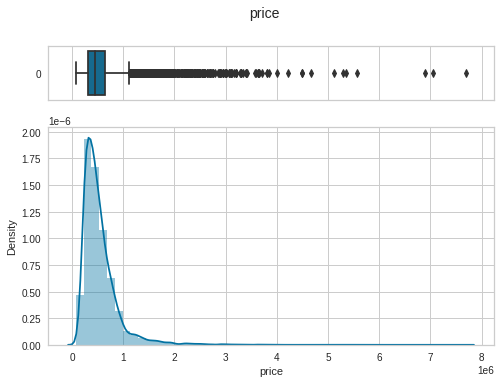

****************************************************************************************************
Evaluating "room_bed". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean        3.37084
std         0.93006
min         0.00000
25%         3.00000
50%         3.00000
75%         4.00000
max        33.00000
Name: room_bed, dtype: float64


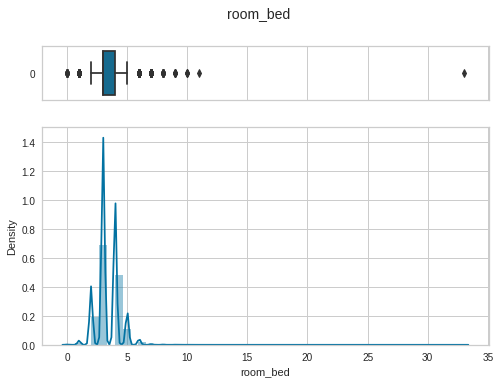

****************************************************************************************************
Evaluating "room_bath". This is stored as float64
NULL COUNT: 0
count   21613.00000
mean        2.11476
std         0.77016
min         0.00000
25%         1.75000
50%         2.25000
75%         2.50000
max         8.00000
Name: room_bath, dtype: float64


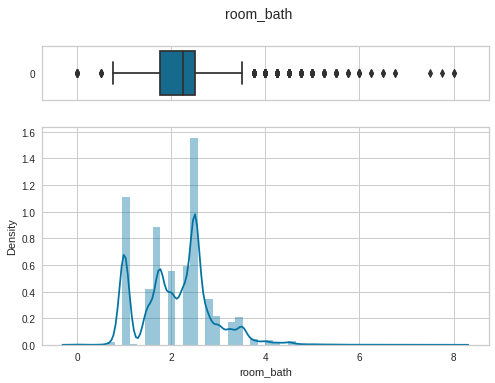

****************************************************************************************************
Evaluating "living_measure". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     2079.89974
std       918.44090
min       290.00000
25%      1427.00000
50%      1910.00000
75%      2550.00000
max     13540.00000
Name: living_measure, dtype: float64


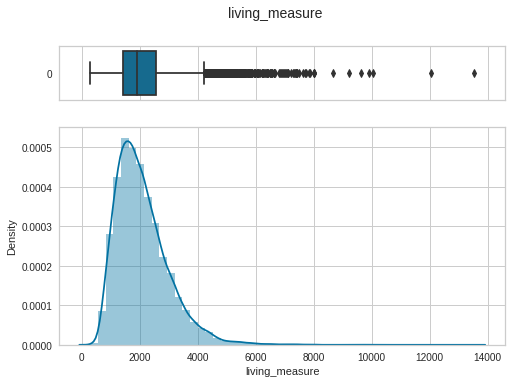

****************************************************************************************************
Evaluating "lot_measure". This is stored as int64
NULL COUNT: 0
count     21613.00000
mean      15106.96757
std       41420.51152
min         520.00000
25%        5040.00000
50%        7618.00000
75%       10688.00000
max     1651359.00000
Name: lot_measure, dtype: float64


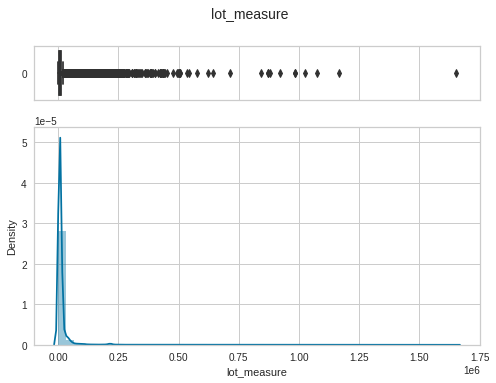

****************************************************************************************************
Evaluating "quality". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean        7.65687
std         1.17546
min         1.00000
25%         7.00000
50%         7.00000
75%         8.00000
max        13.00000
Name: quality, dtype: float64


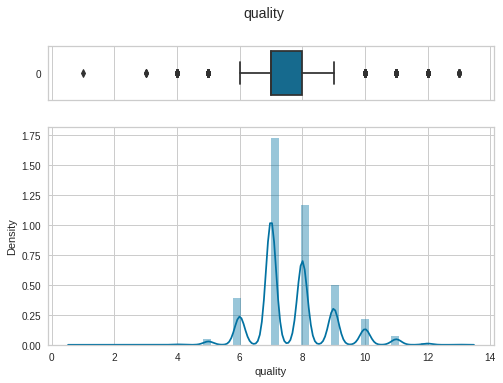

****************************************************************************************************
Evaluating "ceil_measure". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     1788.39069
std       828.09098
min       290.00000
25%      1190.00000
50%      1560.00000
75%      2210.00000
max      9410.00000
Name: ceil_measure, dtype: float64


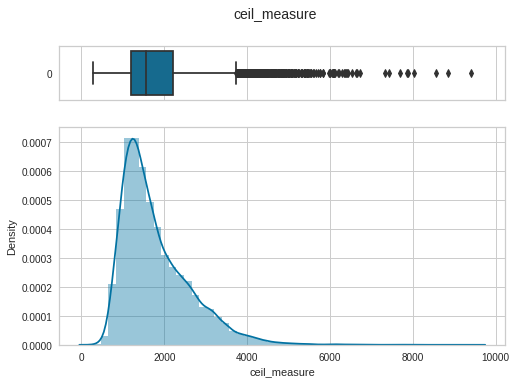

****************************************************************************************************
Evaluating "basement". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean      291.50905
std       442.57504
min         0.00000
25%         0.00000
50%         0.00000
75%       560.00000
max      4820.00000
Name: basement, dtype: float64


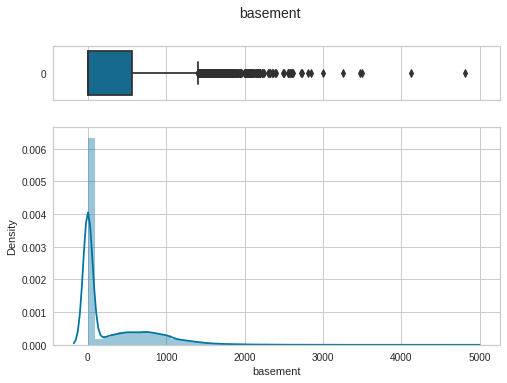

****************************************************************************************************
Evaluating "yr_built". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     1971.00514
std        29.37341
min      1900.00000
25%      1951.00000
50%      1975.00000
75%      1997.00000
max      2015.00000
Name: yr_built, dtype: float64


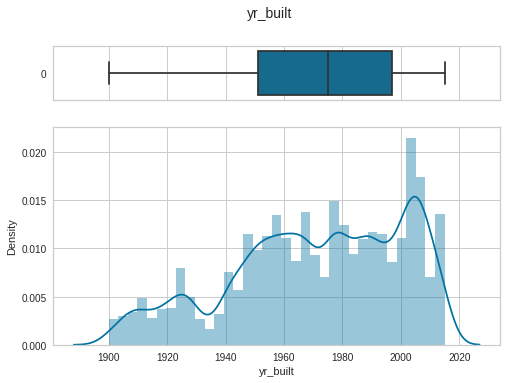

****************************************************************************************************
Evaluating "yr_renovated". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean       84.40226
std       401.67924
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      2015.00000
Name: yr_renovated, dtype: float64


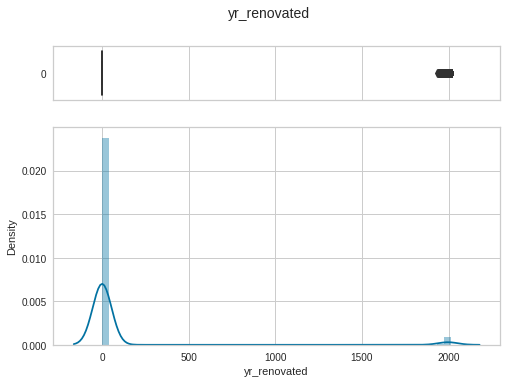

****************************************************************************************************
Evaluating "zipcode". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean    98077.93980
std        53.50503
min     98001.00000
25%     98033.00000
50%     98065.00000
75%     98118.00000
max     98199.00000
Name: zipcode, dtype: float64


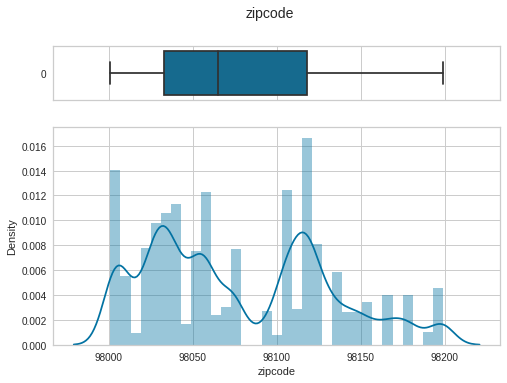

****************************************************************************************************
Evaluating "lat". This is stored as float64
NULL COUNT: 0
count   21613.00000
mean       47.56005
std         0.13856
min        47.15590
25%        47.47100
50%        47.57180
75%        47.67800
max        47.77760
Name: lat, dtype: float64


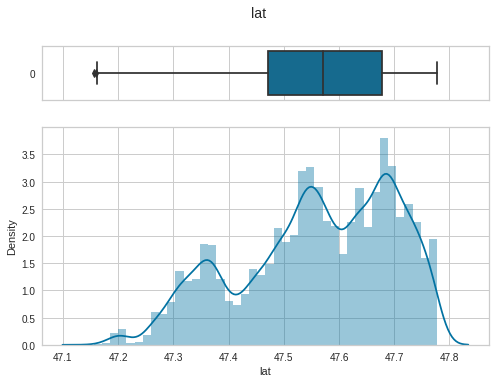

****************************************************************************************************
Evaluating "long". This is stored as float64
NULL COUNT: 0
count   21613.00000
mean     -122.21390
std         0.14083
min      -122.51900
25%      -122.32800
50%      -122.23000
75%      -122.12500
max      -121.31500
Name: long, dtype: float64


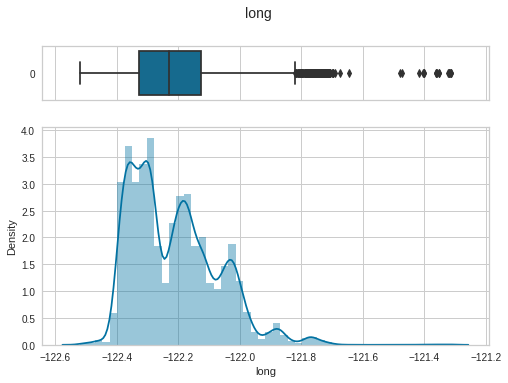

****************************************************************************************************
Evaluating "living_measure15". This is stored as int64
NULL COUNT: 0
count   21613.00000
mean     1986.55249
std       685.39130
min       399.00000
25%      1490.00000
50%      1840.00000
75%      2360.00000
max      6210.00000
Name: living_measure15, dtype: float64


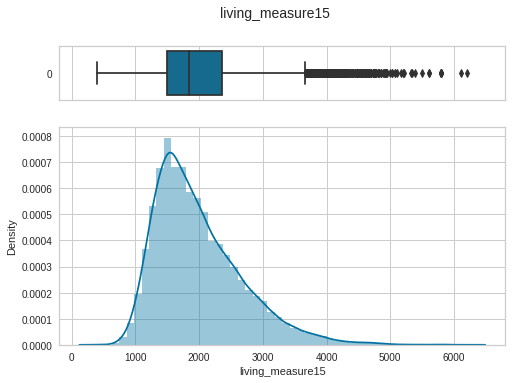

****************************************************************************************************
Evaluating "lot_measure15". This is stored as int64
NULL COUNT: 0
count    21613.00000
mean     12768.45565
std      27304.17963
min        651.00000
25%       5100.00000
50%       7620.00000
75%      10083.00000
max     871200.00000
Name: lot_measure15, dtype: float64


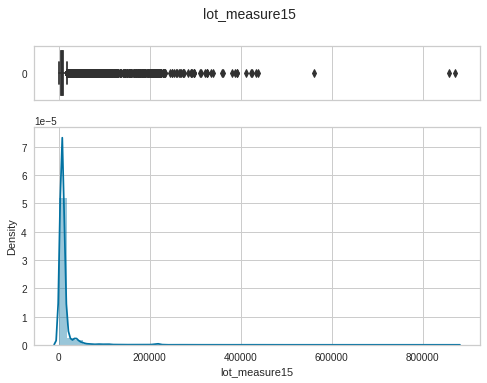

****************************************************************************************************
Evaluating "total_area". This is stored as int64
NULL COUNT: 0
count     21613.00000
mean      17186.86730
std       41589.08122
min        1423.00000
25%        7035.00000
50%        9575.00000
75%       13000.00000
max     1652659.00000
Name: total_area, dtype: float64


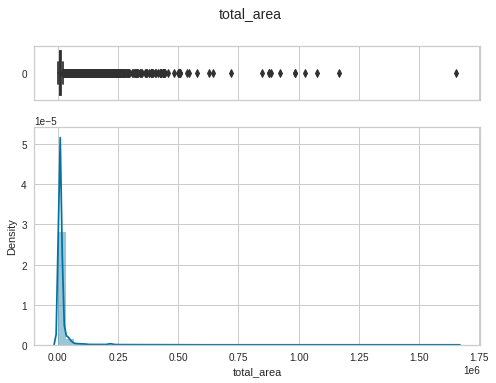

****************************************************************************************************


In [13]:
for c in numerical_like[2:]:
    explore_numerical(Dataset, c)
    print("*"*100)

In [14]:
 # Taking a look at the outlier point for column"room_bed'
    
Dataset[Dataset['room_bed']==33]

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
750,2402100895,20140625T000000,640000,33,1.75000,1620,6000,1.00000,0,0,5,7,1040,580,1947,0,98103,47.68780,-122.33100,1330,4700,0,7620


In [15]:
Dataset[Dataset.basement==0].shape

(13126, 23)

**Calculating percentage -Almost 60% of houses are without basement**

In [16]:
Dataset[Dataset['yr_renovated']>0].shape

(914, 23)

**914 houses were renovated out of 21613 houses**

1.The **Price** is ranging from **75,000 to 77,00,000** and distribution is **right-skewed**.
2.The value of 33 seems to be outlier we need to check the data point before imputing the same
3.Majority of the properties have **bathroom** in the range of 1.0 to 2.5
4.Most properties have **quality** rating between 6 to 10
5.Proprties of **ceil_measure** is hihly skewed towards the right
6.For **Basement** We can see 2 gaussians, which tells us there are propeties which don't have basements and some have the basements
7.**Yr-Built** ranging from 1900 to 2014 in ascending trend

**The above univariate analysis of numeric columns shows that ther are multiple features that have outliers. Lets treat them later in the model**

We will try to handle this or drop for improvng the accuracy of the Model during outlier treatment

Evaluating "ceil". This is stored as float64
NULL COUNT: 0


,Value,Count,Percentage
,1.00000,10680,49.40000
,2.00000,8241,38.10000
,1.50000,1910,8.80000
,3.00000,613,2.80000
,2.50000,161,0.70000
,3.50000,8,0.00000


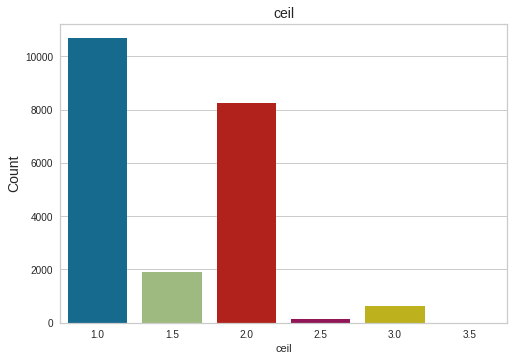

****************************************************************************************************
Evaluating "coast". This is stored as int64
NULL COUNT: 0


,Value,Count,Percentage
,0,21450,99.20000
,1,163,0.80000


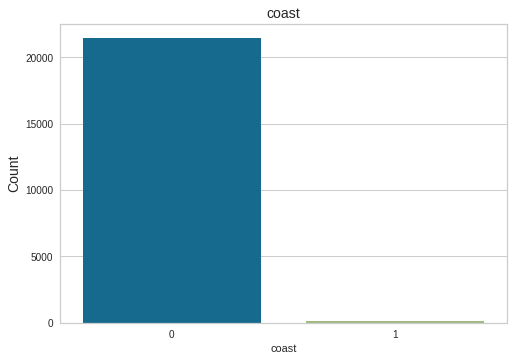

****************************************************************************************************
Evaluating "sight". This is stored as int64
NULL COUNT: 0


,Value,Count,Percentage
,0,19489,90.20000
,2,963,4.50000
,3,510,2.40000
,1,332,1.50000
,4,319,1.50000


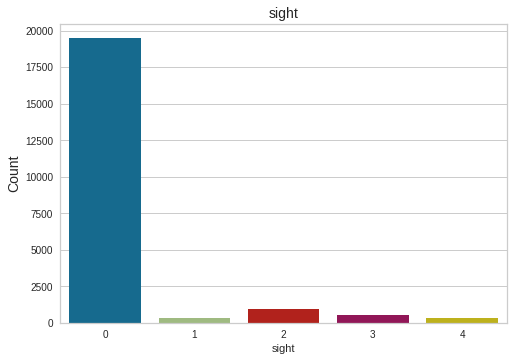

****************************************************************************************************
Evaluating "condition". This is stored as int64
NULL COUNT: 0


,Value,Count,Percentage
,3,14031,64.90000
,4,5679,26.30000
,5,1701,7.90000
,2,172,0.80000
,1,30,0.10000


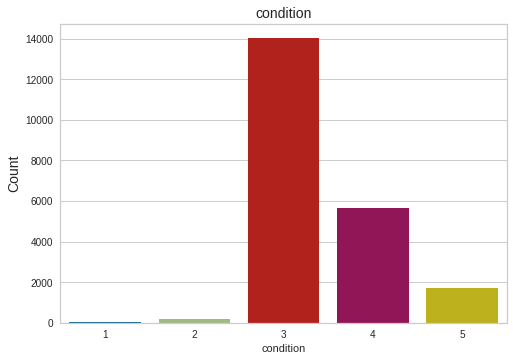

****************************************************************************************************
Evaluating "furnished". This is stored as int64
NULL COUNT: 0


,Value,Count,Percentage
,0,17362,80.30000
,1,4251,19.70000


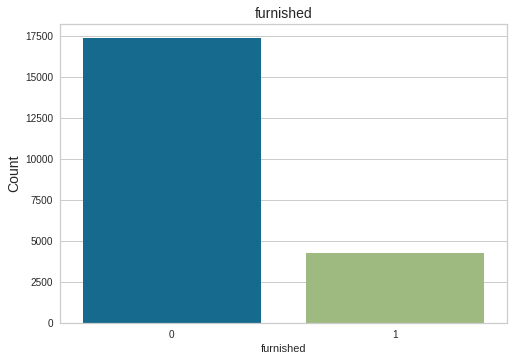

****************************************************************************************************


In [17]:
for c in categorical_like:
    explore_categorical(Dataset, c)
    print("*"*100)

**1.#Feature: ceil -We can see, most houses have Single  floor followed  by 2 floors
  2.#Feature :Sight - most sights have not been viewed
  3.#Feature :condition - Overall most houses are rated as 3 and 4 for its condition
  4 Furnished : Most properties are not furnished**


### Analyzing the feature columns cid and dayhours

In [18]:
# Cid column 
ID_count=Dataset.cid.value_counts()
ID_count[ID_count>1].shape

(176,)

**We can see that there are 176 houses  that are sold more than once . We figured it because we noticed that Cid is appearing many times in the data**


In [19]:
# Function to convert dayhours to date time object


Dataset.dayhours=Dataset.dayhours.str.replace('T000000', "")

Dataset.dayhours=pd.to_datetime(Dataset.dayhours,format='%Y%m%d')


In [20]:
# Taking a copy of the original dataset
Dataset_original=Dataset.copy()

# Splitting Month here for Analysis purpose
Dataset['month_year']=Dataset['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
Dataset['month_year'].head()

0    November-2014
1    December-2014
2       April-2015
3         May-2014
4       April-2015
Name: month_year, dtype: object

**IDENTIFYING MOST SOLD HOUSE BASED ON MONTH**

In [21]:
Dataset['month_year'].value_counts()

April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: month_year, dtype: int64

We can see, most houses sold in April and July month

**IDENTIFYING MOST COMMON SOLD HOUSE TYPE**

Text(0, 0.5, 'Count')

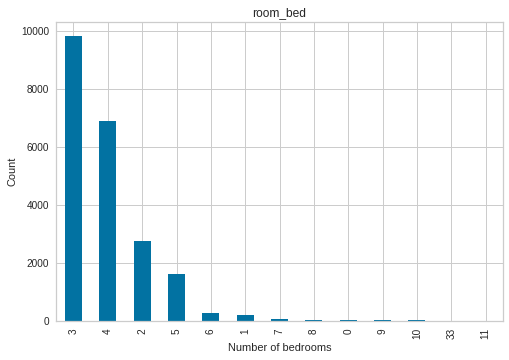

In [22]:
Dataset.room_bed.value_counts().plot(kind='bar')
plt.title('room_bed')
plt.xlabel('Number of bedrooms')
plt.ylabel('Count')

**From the above plot its is evident that the highest selling house type is that which has 3 bedrooms and the next highest is 4**

How is the Info helpful?

Based on the above data a builder can build houses that are bought commonly (3 bedroom) which could possibly attract the higher middle calss and high class people.

# BIVARIATE ANALYSIS

\**IDENTIFYING THE COMMON LOCATION WHERE MOST HOUSES ARE BUILT**

<Figure size 720x720 with 0 Axes>

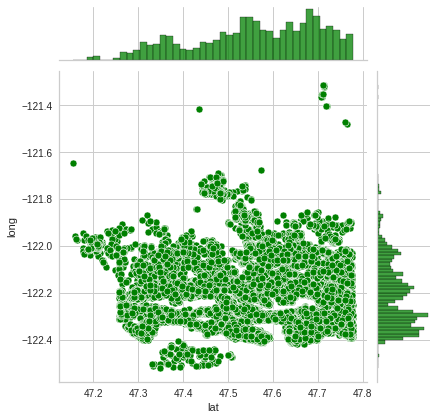

In [23]:
plt.figure(figsize=(10,10))
sns.jointplot(x="lat", y="long", data=Dataset, color ='green')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**From the above plot its is evident that most of the houses are localted beween a latitude of 47.7 and 47.8 , Longitude of 122.2 to -122.4**

How is the Info helpful?

Most of the buyers preferring these locations 

**Analysis target "Price" with other features affecting it**

Text(0.5, 1.0, 'Price vs Square feet')

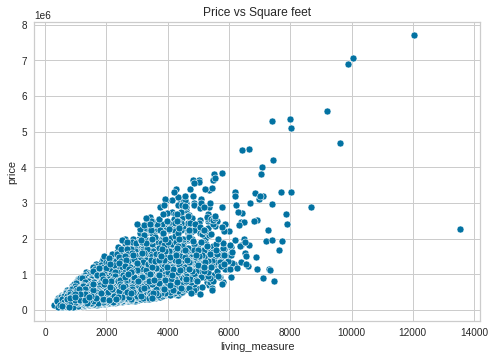

In [24]:
sns.scatterplot(y=Dataset['price'], x=Dataset['living_measure'],);
plt.title("Price vs Square feet")

Text(0.5, 1.0, 'Price vs lot measure')

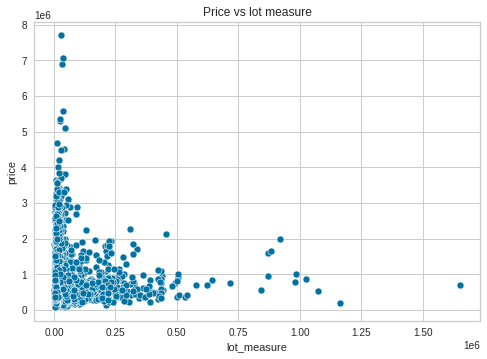

In [25]:
sns.scatterplot(y=Dataset['price'], x=Dataset['lot_measure'],);
plt.title("Price vs lot measure")

**1.Above scatter plot indicates that there is a linear relationship b/w Price and the living area**
**2. Larger the Livng area ,higer the price is.**
**3.We do see some outliers as well where the larger property is sold for lesser Price. This could be some one off issue or wrong data enetered.**
**4.Lot measure has no relation with the Price trend**


Text(0.5, 1.0, 'Prive vs Longitude')

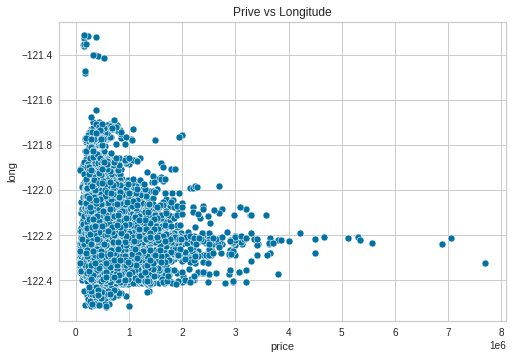

In [26]:
sns.scatterplot(x=Dataset['price'], y=Dataset['long'],);
plt.title("Prive vs Longitude")

**Above Scatter plot between Price and longitude tells us interesting observation that -122.2 to -122.4 sells houses at much higher amount.**

Analyzing 'month_year' vs Price using **Factor plots**


,mean,median,size
month_year,,,
April-2015,561933.46302,476500.00000,2231
August-2014,536527.03969,442100.00000,1940
December-2014,524602.89327,432500.00000,1471
February-2015,507919.60320,425545.00000,1250
January-2015,525963.25153,438500.00000,978
July-2014,544892.16101,465000.00000,2211
June-2014,558123.73624,465000.00000,2180
March-2015,544057.68320,450000.00000,1875
May-2014,548166.60011,465000.00000,1768


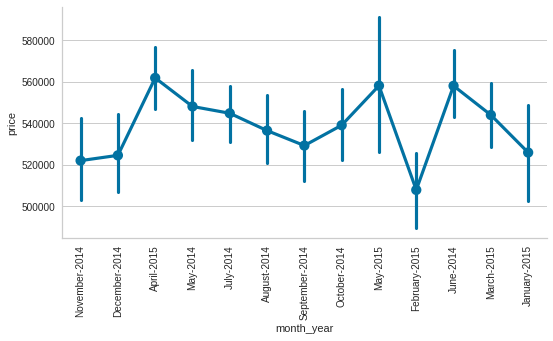

In [27]:
sns.factorplot(x='month_year',y='price',data=Dataset, size=4, aspect=2)
plt.xticks(rotation=90)
#groupby
Dataset.groupby('month_year')['price'].agg(['mean','median','size'])

From the Factor plot above , we can see that the mean price of the houses are high during March,April, May compared to September, October, November,December period. 

In [28]:
#sns.pairplot(Dataset, corner=True)


<ol>
    <li><b>CID:</b> House ID/Property ID.Not used for analysis</li>
    <li><b>Dayhours:</b> 5 factor analysis is reflecting for this column</li>
    <li><b>price:</b> Our taget column value is in 75k - 7700k range. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>room_bed:</b> Number of bedrooms range from 0 - 33. As Mean slightly > Median, it's <b>slightly Right-Skewed.</b></li>
    <li><b>room_bath:</b> Number of bathrooms range from 0 - 8. As Mean slightly &lt; Median, it's <b>slightly Left-Skewed</b>.</li>
    <li><b>living_measure:</b> Square footage of house range from 290 - 13,540. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lot_measure:</b> Square footage of lot range from 520 - 16,51,359. As Mean almost double of Median, it's <b>Hightly Right-Skewed</b>.</li>
    <li><b>ceil:</b> Number of floors range from 1 - 3.5 As Mean ~ Median, it's <b>almost Normal Distributed</b>.</li>
    <li><b>coast:</b> As this value represent whether house has waterfront view or not. It's <b>categorical column</b>. From above analysis we got know, very few houses has waterfront view.</li>
    <li><b>sight:</b> Value ranges from 0 - 4. As Mean > Median, it's <b>Right-Skewed</b></li>
    <li><b>condition:</b> Represents rating of house which ranges from 1 - 5. As Mean > Median, it's <b>Right-Skewed</b></li>
    <li><b>quality:</b> Representign grade given to house which range from 1 - 13. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>ceil_measure:</b> Square footage of house apart from basement ranges in 290 - 9,410. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>basement:</b> Square footage house basement ranges in 0 - 4,820. As Mean highlty > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>yr_built:</b> House built year ranges from 1900 - 2015. As Mean &lt; Median, it's <b>Left-Skewed</b>.</li>
    <li><b>yr_renovated:</b> House renovation year only 2015. So this column can be used as <b>Categorical Variable</b> for knowing whether house is renovated or not.</li>
    <li><b>zipcode:</b> House ZipCode ranges from 98001 - 98199. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lat:</b> Lattitude ranges from 47.1559 - 47.7776 As Mean &lt; Median, it's <b>Left-Skewed</b>.</li>
    <li><b>long:</b> Longittude ranges from -122.5190 to -121.315 As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>living_measure15:</b> Value ragnes from 399 to 6,210. As Mean > Median, it's <b>Right-Skewed</b>.</li>
    <li><b>lot_measure15:</b> Value ragnes from 651 to 8,71,200. As Mean highly > Median, it's <b>Highly Right-Skewed</b>.</li>
    <li><b>furnished:</b> Representing whether house is furnished or not. It's a <b>Categorical Variable</b></li>
    <li><b>total_area</b> Total area of house ranges from 1,423 to 16,52,659. As Mean is almost double of Median, it's <b>Highly Right-Skewed</b></li>
</ol>

From above analysis we got to know,

Most columns distribution is Right-Skewed and only few features are Left-Skewed (like room_bath, yr_built, lat).

We have columns which are Categorical in nature are -> coast, yr_renovated, furnished

In [29]:
# let's see corelatoin between the different features
Dataset_corr = Dataset.corr(method ='pearson')
Dataset_corr

,cid,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
cid,1.00000,-0.01680,0.00129,0.00516,-0.01226,-0.13211,0.01853,-0.00272,0.01159,-0.02378,0.00813,-0.01084,-0.00515,0.02138,-0.01691,-0.00822,-0.00189,0.02080,-0.00290,-0.13880,-0.01001,-0.13184
price,-0.01680,1.00000,0.30834,0.52513,0.70204,0.08966,0.25679,0.26633,0.39735,0.03639,0.66746,0.60557,0.32384,0.05398,0.12644,-0.05317,0.30692,0.02157,0.58537,0.08246,0.56599,0.10480
room_bed,0.00129,0.30834,1.00000,0.51588,0.57667,0.03170,0.17543,-0.00658,0.07953,0.02847,0.35697,0.47760,0.30309,0.15418,0.01884,-0.15267,-0.00893,0.12947,0.39164,0.02924,0.25927,0.04431
room_bath,0.00516,0.52513,0.51588,1.00000,0.75467,0.08774,0.50065,0.06374,0.18774,-0.12498,0.66498,0.68534,0.28377,0.50602,0.05074,-0.20387,0.02457,0.22304,0.56863,0.08718,0.48492,0.10405
living_measure,-0.01226,0.70204,0.57667,0.75467,1.00000,0.17283,0.35395,0.10382,0.28461,-0.05875,0.76270,0.87660,0.43504,0.31805,0.05536,-0.19943,0.05253,0.24022,0.75642,0.18329,0.63295,0.19421
lot_measure,-0.13211,0.08966,0.03170,0.08774,0.17283,1.00000,-0.00520,0.02160,0.07471,-0.00896,0.11362,0.18351,0.01529,0.05308,0.00764,-0.12957,-0.08568,0.22952,0.14461,0.71856,0.11888,0.99976
ceil,0.01853,0.25679,0.17543,0.50065,0.35395,-0.00520,1.00000,0.02370,0.02944,-0.26377,0.45818,0.52388,-0.24570,0.48932,0.00634,-0.05912,0.04961,0.12542,0.27989,-0.01127,0.34775,0.00264
coast,-0.00272,0.26633,-0.00658,0.06374,0.10382,0.02160,0.02370,1.00000,0.40186,0.01665,0.08277,0.07207,0.08059,-0.02616,0.09288,0.03028,-0.01427,-0.04191,0.08646,0.03070,0.06988,0.02381
sight,0.01159,0.39735,0.07953,0.18774,0.28461,0.07471,0.02944,0.40186,1.00000,0.04599,0.25132,0.16765,0.27695,-0.05344,0.10392,0.08483,0.00616,-0.07840,0.28044,0.07257,0.22025,0.08069
condition,-0.02378,0.03639,0.02847,-0.12498,-0.05875,-0.00896,-0.26377,0.01665,0.04599,1.00000,-0.14467,-0.15821,0.17410,-0.36142,-0.06062,0.00303,-0.01494,-0.10650,-0.09282,-0.00341,-0.12190,-0.01022


We have linear relationships in below featues as we got to know from above matrix

<ol>
    <li><b>price</b>: room_bath, living_measure, quality, living_measure15, furnished</li>
    <li><b>living_measure</b>: price, room_bath. So we can consider dropping 'room_bath' variable.</li>
    <li><b>quality</b>: price, room_bath, living_measure</li>
    <li><b>ceil_measure</b>: price, room_bath, living_measure, quality</li>
    <li><b>living_measure15</b>: price, living_measure, quality. So we can  consider dropping living_measure15 as well. As it's giving same info as living_measure.</li>
    <li><b>lot_measure15</b>: lot_measure. Therefore, we can consider dropping lot_measure15, as it's giving same info.</li>
    <li><b>furnished</b>: quality</li>
    <li><b>total_area</b>: lot_measure, lot_measure15. Therefore, we can consider dropping total_area feature as well. As it's giving same info as lot_measure.</li>
</ol>

We can plot heatmap and can easily confirm our above findings

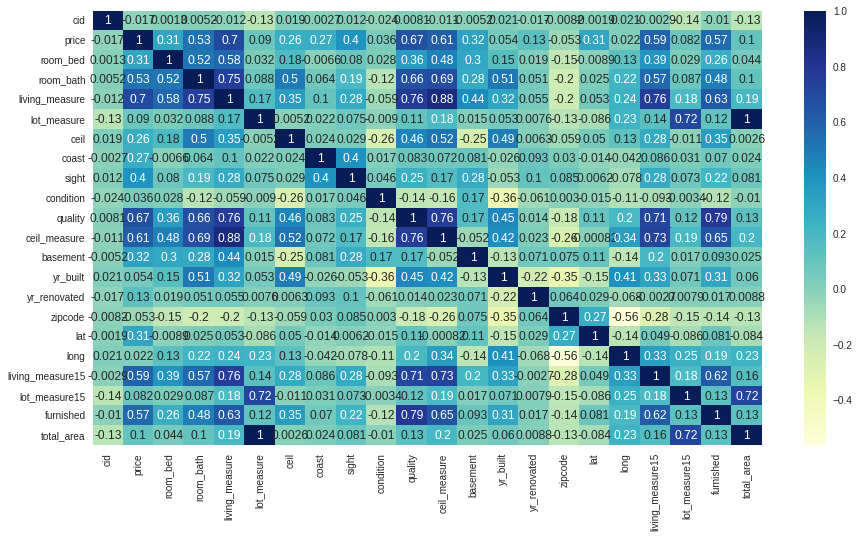

In [30]:
# Heat Map:

# Plotting heatmap
plt.subplots(figsize =(15, 8)) 
sns.heatmap(Dataset_corr,cmap="YlGnBu",annot=True)

### Multicollinearity 

In [31]:
upper = Dataset_corr.where(np.triu(np.ones(Dataset_corr.shape), k=1).astype(np.bool))
to_drop = [i for i in upper.columns if any(upper[i] > 0.70)]
to_drop

['living_measure',
 'quality',
 'ceil_measure',
 'living_measure15',
 'lot_measure15',
 'furnished',
 'total_area']

#### Some of the above features having high correlation with each other so we will try dropping them at Data processing stage

In [32]:
# Printing the correlation value for the above columns :
for x in to_drop:
    print(x,':')
    print(Dataset_corr[x])
    print("*****************************\n")

living_measure :
cid                -0.01226
price               0.70204
room_bed            0.57667
room_bath           0.75467
living_measure      1.00000
lot_measure         0.17283
ceil                0.35395
coast               0.10382
sight               0.28461
condition          -0.05875
quality             0.76270
ceil_measure        0.87660
basement            0.43504
yr_built            0.31805
yr_renovated        0.05536
zipcode            -0.19943
lat                 0.05253
long                0.24022
living_measure15    0.75642
lot_measure15       0.18329
furnished           0.63295
total_area          0.19421
Name: living_measure, dtype: float64
*****************************

quality :
cid                 0.00813
price               0.66746
room_bed            0.35697
room_bath           0.66498
living_measure      0.76270
lot_measure         0.11362
ceil                0.45818
coast               0.08277
sight               0.25132
condition          -0.14467
quality  

In [33]:
#For current working directory
cwd = os.getcwd()

In [34]:
## Need to add file USA ZipCodes_1.xlsx to current working directory to access this data
Zipcodesxl=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Capstone GL/uszips.csv')
Zipcodesxl.head()

,zipcode,city,county_name
0,601,Adjuntas,Adjuntas
1,602,Aguada,Aguada
2,603,Aguadilla,Aguadilla
3,606,Maricao,Maricao
4,610,Anasco,Añasco


In [35]:
Dataset=Dataset.merge(Zipcodesxl,how='left',on='zipcode')


In [36]:
Dataset.shape
Dataset.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,month_year,city,county_name
0,3034200666,2014-11-07,808100,4,3.25000,3020,13457,1.00000,0,0,5,9,3020,0,1956,0,98133,47.71740,-122.33600,2120,7553,1,16477,November-2014,Seattle,King
1,8731981640,2014-12-04,277500,4,2.50000,2550,7500,1.00000,0,0,3,8,1750,800,1976,0,98023,47.31650,-122.38600,2260,8800,0,10050,December-2014,Federal Way,King
2,5104530220,2015-04-20,404000,3,2.50000,2370,4324,2.00000,0,0,3,8,2370,0,2006,0,98038,47.35150,-121.99900,2370,4348,0,6694,April-2015,Maple Valley,King
3,6145600285,2014-05-29,300000,2,1.00000,820,3844,1.00000,0,0,4,6,820,0,1916,0,98133,47.70490,-122.34900,1520,3844,0,4664,May-2014,Seattle,King
4,8924100111,2015-04-24,699000,2,1.50000,1400,4050,1.00000,0,0,4,8,1400,0,1954,0,98115,47.67680,-122.26900,1900,5940,0,5450,April-2015,Seattle,King


In [37]:
## Reading the WSDOT shape file from the drive
usa = gpd.read_file('/content/drive/My Drive/Colab Notebooks/Capstone GL/WA/WSDOT_-_City_Limits/WSDOT_-_City_Limits/WSDOT_-_City_Limits.shp')
usa.head()

,OBJECTID,CityName,CountySeat,CityGNISPl,LastUpdate,CountyFIPS,MajorCity,CityFIPSLo,OFMCityCod,GlobalID,SHAPESTAre,SHAPESTLen,geometry
0,8325,Aberdeen,no,2409655,2018-08-31,53027,yes,5300100,0005,{47788AF8-9B9E-4F75-88A4-426B749E21C3},350866352.25527,148153.71439,"MULTIPOLYGON (((-123.82066 46.94810, -123.8260..."
1,8326,Airway Heights,no,2409668,2012-08-31,53063,no,5300905,0010,{630CB3CF-FE41-48A6-9AB8-F780CC4000BF},167832563.69466,70256.61895,"POLYGON ((-117.56128 47.66762, -117.56115 47.6..."
2,8327,Albion,no,2412345,None,53075,no,5301010,0015,{A9E6CED5-4EA5-43D7-B04E-5D976C39396D},10949178.54047,17913.58194,"POLYGON ((-117.25327 46.78603, -117.25350 46.7..."
3,8328,Algona,no,2409680,2013-08-31,53033,no,5301290,0020,{C330E743-AA73-4F77-BBB5-A663A2551F07},37220383.40779,33737.44902,"POLYGON ((-122.23986 47.29365, -122.24502 47.2..."
4,8329,Almira,no,2412352,2014-02-28,53043,no,5301500,0025,{88A7F9CA-66BD-4374-86FD-959FAA0C90EF},14172147.19954,27368.46568,"POLYGON ((-118.94229 47.71770, -118.94216 47.7..."


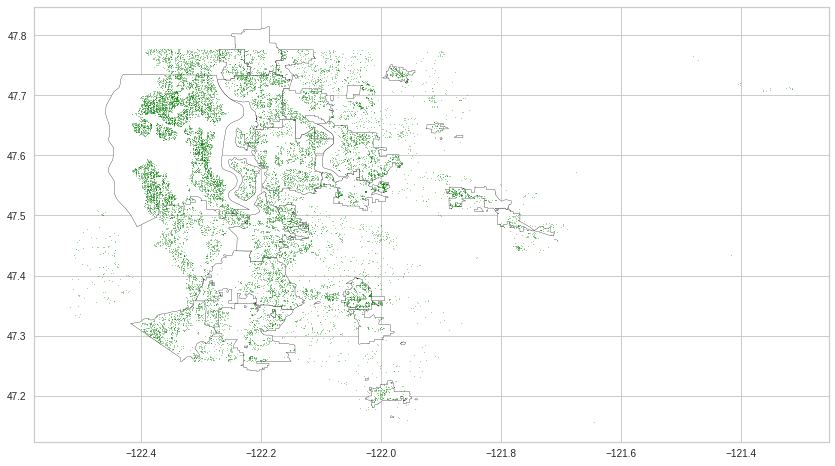

<Figure size 1080x1080 with 0 Axes>

In [38]:

gdf = gpd.GeoDataFrame(
    Dataset,geometry = [Point(xy) for xy in zip(Dataset['long'], Dataset['lat'])])
#We can now plot our ``GeoDataFrame``
ax=usa[usa.CityName.isin(Dataset.city.unique())].plot(
    color='white', edgecolor='black',figsize=(20,8))
plt.figure(figsize=(15,15))
gdf.plot(ax=ax, color='green', marker='o',markersize=0.1)

** IDENTIFYING THE COMMON CITY WHERE MOST HOUSES ARE BUILT**

In [39]:
Dataset.city.value_counts()

Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: city, dtype: int64

** We can see that Seattle is the state where more houses are built and least in Medina** 

In [40]:
Dataset.dtypes

cid                          int64
dayhours            datetime64[ns]
price                        int64
room_bed                     int64
room_bath                  float64
living_measure               int64
lot_measure                  int64
ceil                       float64
coast                        int64
sight                        int64
condition                    int64
quality                      int64
ceil_measure                 int64
basement                     int64
yr_built                     int64
yr_renovated                 int64
zipcode                      int64
lat                        float64
long                       float64
living_measure15             int64
lot_measure15                int64
furnished                    int64
total_area                   int64
month_year                  object
city                        object
county_name                 object
geometry                  geometry
dtype: object

In [41]:
# Creating a new variable which gives the ratio of living measure and total area called 'Houseland' ratio
Dataset["HouseLandRatio"]=np.round((Dataset['living_measure']/Dataset['total_area']),2)*100
Dataset["HouseLandRatio"].head()

0   18.00000
1   25.00000
2   35.00000
3   18.00000
4   26.00000
Name: HouseLandRatio, dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


,mean,median,size
yr_renovated,,,
1934,459950.00000,459950.00000,1
1940,378400.00000,378400.00000,2
1944,521000.00000,521000.00000,1
1945,398666.66667,375000.00000,3
1946,351137.50000,351137.50000,2
1948,410000.00000,410000.00000,1
1950,291450.00000,291450.00000,2
1951,276000.00000,276000.00000,1
1953,245816.66667,247500.00000,3


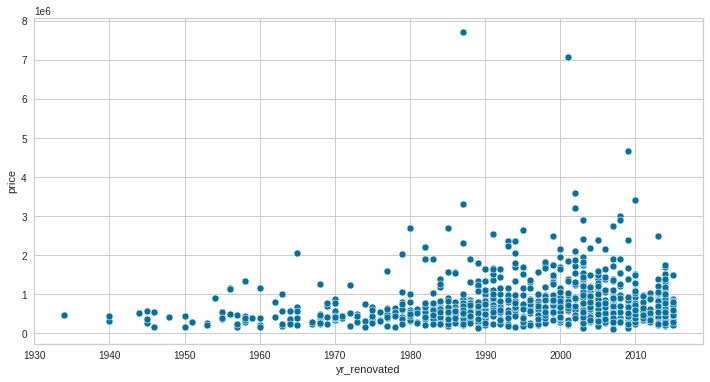

In [42]:
### Analyzing Bivariate for Feature: yr_renovated
plt.figure(figsize=(12, 6))
x=Dataset[Dataset['yr_renovated']>0]
print(sns.scatterplot(x['yr_renovated'],x['price']))
#groupby
x.groupby('yr_renovated')['price'].agg(['mean','median','size'])


We can see most of the houses renovated after 1980. Lets create new categorical variable 'Has_been_renovated' 

In [43]:
# Creating another variable called 'Has_been_renovated'-- We do this because the renovated houses are sold at higher prices

def create_renovated_feature(series):
    if series == 0:
        return 0
    elif series > 0:
        return 1
    
Dataset['has_renovated'] = Dataset['yr_renovated'].apply(create_renovated_feature)


In [44]:
Dataset['has_renovated'].value_counts()

0    20699
1      914
Name: has_renovated, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


price                     HouseLandRatio                
                      mean       median   size           mean   median   size
has_renovated                                                                
0             530447.95860 448000.00000  20699       22.06706 20.00000  20699
1             760628.77790 600000.00000    914       22.29650 21.00000    914

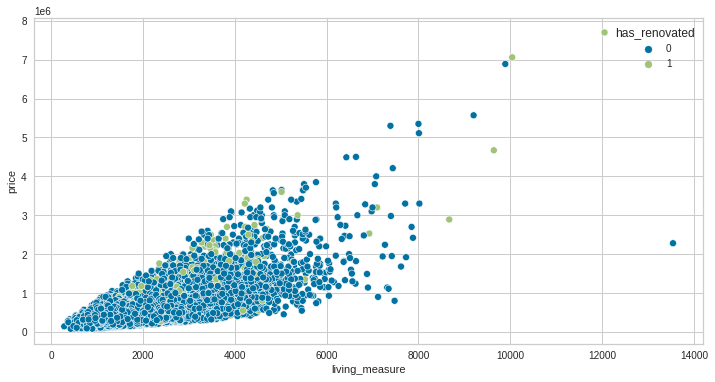

In [45]:
# Lets plot the new created'has been renovated' variable with respect to price and HouseLandRatio to see if we find something interesting

plt.figure(figsize=(12, 6))
print(sns.scatterplot(Dataset['living_measure'],Dataset['price'],hue=Dataset['has_renovated']))
#groupby
Dataset.groupby(['has_renovated'])['price','HouseLandRatio'].agg(['mean','median','size'])

Above Plot clearly shows that Renovated properties have higher price than others with same living measure space.

In [46]:
# Creating another variable called 'Has_basement'-- We do this to check the property with more basements sold at higher prices

def create_basement_feature(series):
    if series == 0:
        return 0
    elif series > 0:
        return 1
    
Dataset['has_basement'] = Dataset['basement'].apply(create_basement_feature)

price                     living_measure                  
                     mean       median   size           mean     median   size
has_basement                                                                  
0            486945.39479 411500.00000  13126     1928.87963 1740.00000  13126
1            622518.17438 515000.00000   8487     2313.46754 2100.00000   8487

<Figure size 864x432 with 0 Axes>

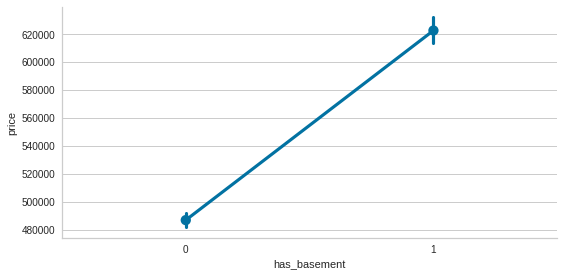

In [47]:
 # Lets plot the new created'has_ basement' variable with respect to price and sqft to see if we find something interesting

plt.figure(figsize=(12, 6))
print(sns.factorplot(x='has_basement',y='price',data=Dataset, size = 4, aspect = 2))
#groupby
Dataset.groupby(['has_basement'])['price','living_measure'].agg(['mean','median','size'])

Above Plot clearly shows that houses with basement are sold at higher prices than those without the basement

#### DATA PROCESSING

In [48]:
# # for has_renovated feature
# def create_renovated_feature(series):
#     if series == 0:
#         return 0
#     elif series > 0:
#         return 1
    
# ip['has_renovated'] = ip['yr_renovated'].apply(create_renovated_feature)

# # yr_built_diff
# ip['yr_built_diff']=2022-ip['yr_built']

# # difference between house sold vs current year
# curr_time = pd.to_datetime("now")   # current date
# difference = (curr_time-ip['dayhours'])/np.timedelta64(1,'W')
# ip['difference']=difference

# # dropping features
# ip.drop(['cid','dayhours','yr_renovated','zipcode','ceil_measure','yr_built','living_measure','lot_measure'],axis=1)




In [49]:
# At the end of outlier treatment , taking a copy of this dataset.

Dataset_new=Dataset.copy()
Dataset_new.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,condition,quality,ceil_measure,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,month_year,city,county_name,geometry,HouseLandRatio,has_renovated,has_basement
0,3034200666,2014-11-07,808100,4,3.25000,3020,13457,1.00000,0,0,5,9,3020,0,1956,0,98133,47.71740,-122.33600,2120,7553,1,16477,November-2014,Seattle,King,POINT (-122.33600 47.71740),18.00000,0,0
1,8731981640,2014-12-04,277500,4,2.50000,2550,7500,1.00000,0,0,3,8,1750,800,1976,0,98023,47.31650,-122.38600,2260,8800,0,10050,December-2014,Federal Way,King,POINT (-122.38600 47.31650),25.00000,0,1
2,5104530220,2015-04-20,404000,3,2.50000,2370,4324,2.00000,0,0,3,8,2370,0,2006,0,98038,47.35150,-121.99900,2370,4348,0,6694,April-2015,Maple Valley,King,POINT (-121.99900 47.35150),35.00000,0,0
3,6145600285,2014-05-29,300000,2,1.00000,820,3844,1.00000,0,0,4,6,820,0,1916,0,98133,47.70490,-122.34900,1520,3844,0,4664,May-2014,Seattle,King,POINT (-122.34900 47.70490),18.00000,0,0
4,8924100111,2015-04-24,699000,2,1.50000,1400,4050,1.00000,0,0,4,8,1400,0,1954,0,98115,47.67680,-122.26900,1900,5940,0,5450,April-2015,Seattle,King,POINT (-122.26900 47.67680),26.00000,0,0


In [50]:
# to take the difference between when house built to current year

Dataset_new['yr_built_diff']=2022-Dataset_new['yr_built']

curr_time = pd.to_datetime("now")   # current date

# to take the difference between when house sold to current year

difference = (curr_time-Dataset_new['dayhours'])/np.timedelta64(1,'W')

Dataset_new['difference']=difference



# Dropping the variables that will not have any impact on our model evaluation

1. We are deleting Cid because its a integer value for just count package
2. we already converted dayhours into the difference between house sold to current date hence deleting dayhours and month_year
3. for yr_renovated we already took has_renovated feature 
4. we have lat and long for location of house hence we are deleting zipcode, country_name, geometry, city
5. we have updated values in living_measure15 and lot_measure15 hence we are deleting living_measure and lot_measure
6. We found that ceil_measure has same value as living_measure hence we are deleting that ceil_measure


In [51]:
Dataset_new[["ceil_measure",'living_measure']]

,ceil_measure,living_measure
0,3020,3020
1,1750,2550
2,2370,2370
3,820,820
4,1400,1400
...,...,...
21608,2303,2303
21609,3490,3490
21610,2790,2790
21611,1440,1440


In [52]:
#Dropping the feature not required in 1st Iteration
Dataset_final=Dataset_new.drop(['cid','dayhours','yr_renovated','zipcode','county_name','geometry','month_year','ceil_measure','city','has_basement','yr_built','living_measure','lot_measure','HouseLandRatio'],axis=1)

###Outliers Detection and Treatment

---



In [53]:
def outlier_report(df, cutoff_percent = 0):
    '''Receive a dataframe df, series or a numpy array.
     print column name, outlier count and percent of values that are outliers.
     cutoff_percent is the reporting cutoff. Columns with more than this many ouliers will be displayed.
     Default cutoff_percent is 0; the function returns all columns with even a single outlier.

    returns a list of column names (columns containing outliers)
    ''' 
    
    df = pd.DataFrame(df) # just to ensure we can process numpy arrays and pandas Series as well.

    if cutoff_percent == 0:
        cutoff_string = ''
    else:
        cutoff_string = f" more than {cutoff_percent} percent"    
  
    def outlier_counter(col):
        '''Count the outliers as per 1.5*IQR rule'''
        qL = col.quantile(0.25)
        qH = col.quantile(0.75)
        iqr = qH-qL
        whiskL =  qL-1.5*iqr
        whiskH =  qH+1.5*iqr
        low  = (col < whiskL).sum()
        high = (col > whiskH).sum()
        total = low+high
        return total
 
    cols, counts, percents = [],[],[]
    length = len(df)
    
    for c in df:
        if (df[c].dtypes != 'object'):
            count  = outlier_counter(df[c])
            percent = count*100/length
        if percent > cutoff_percent:
            cols.append(c)
            counts.append(count)
            percents.append(percent)
  
    report_df = pd.DataFrame()
    if len(counts)>0:
      print(f'OUTLIER REPORT\nColumns with{cutoff_string} outliers')
      report_df['Column Name'] = cols
      report_df['Outlier Count'] = counts
      report_df['Outlier Percent'] = percents
      display(report_df.round(2))
    else:
        print(f'There are no columns with{cutoff_string} outliers.')
  
    return cols
    ############################################   END OF FUNCTION   ##################################


In [54]:
#Outlier Report:
LST = []
numer_columns=['room_bed','room_bath','living_measure15','lot_measure15' ,'basement']
for i,item in  enumerate(numer_columns):
    outlier_report(Dataset_final[item])
    data_log = np.cbrt(Dataset_final[item])
    LST.append(data_log)
    

OUTLIER REPORT
Columns with outliers


,Column Name,Outlier Count,Outlier Percent
0,room_bed,546,2.53000


OUTLIER REPORT
Columns with outliers


,Column Name,Outlier Count,Outlier Percent
0,room_bath,571,2.64000


OUTLIER REPORT
Columns with outliers


,Column Name,Outlier Count,Outlier Percent
0,living_measure15,544,2.52000


OUTLIER REPORT
Columns with outliers


,Column Name,Outlier Count,Outlier Percent
0,lot_measure15,2194,10.15000


OUTLIER REPORT
Columns with outliers


,Column Name,Outlier Count,Outlier Percent
0,basement,496,2.29000


The outlier report shows the column with outlier count and their percentage. Lets treat each of them in the outlier treatment by Imputing with 2 SD

In [55]:
# Using the function, lets get the lowerbound and upperbound values
def outlier_treatment(dc):
    sorted(dc)
    Q1,Q3 = np.percentile(Dataset_final.loc[:,dc] , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    return lower_range,upper_range

In [56]:
# Skewness before trating outliers

Dataset_final.skew().sort_values(ascending=False)

total_area         12.95607
coast              11.38511
lot_measure15       9.50674
has_renovated       4.54903
price               4.02172
sight               3.39575
room_bed            1.97430
basement            1.57797
furnished           1.52623
living_measure15    1.10818
condition           1.03280
long                0.88505
quality             0.77110
ceil                0.61618
room_bath           0.51111
yr_built_diff       0.46981
difference         -0.17911
lat                -0.48527
dtype: float64

In [57]:
#Outlier treatment:
LST = []

# here we are treating only 'total_area','lot_measure15','price' because it have higher skewness

numer_columns=['total_area','lot_measure15','price']

for i,item in  enumerate(numer_columns):
  for x in [item]:
    I3,I1 = np.percentile(Dataset_final.loc[:,x],[75,25]) # Calculating 75th and 25th percentile
    IQR = I3-I1 # IQR range
    max = I3+(1.5*IQR)
    min = I1-(1.5*IQR)
    Dataset_final.loc[Dataset_final[x] < min,x] = Dataset_final[item].mean() - 2*Dataset_final[item].std()
    Dataset_final.loc[Dataset_final[x] > max,x] = Dataset_final[item].mean() + 2*Dataset_final[item].std()
    #data_log = np.cbrt(Dataset[item])
    #LST.append(data_log)
    

Skewness is :
 coast              11.38511
has_renovated       4.54903
sight               3.39575
lot_measure15       2.50543
total_area          2.38610
room_bed            1.97430
basement            1.57797
furnished           1.52623
price               1.21781
living_measure15    1.10818
condition           1.03280
long                0.88505
quality             0.77110
ceil                0.61618
room_bath           0.51111
yr_built_diff       0.46981
difference         -0.17911
lat                -0.48527
dtype: float64


count     21613.00000
mean     519400.99816
std      270607.71169
min       75000.00000
25%      321950.00000
50%      450000.00000
75%      645000.00000
max     1274906.62223
Name: price, dtype: float64

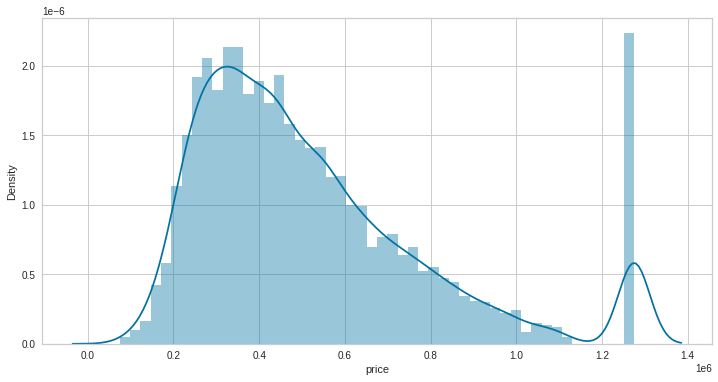

In [58]:
# Lets check the skewness after treating the outliers

#ceil_measure
print("Skewness is :\n", Dataset_final.skew().sort_values(ascending=False))
plt.figure(figsize=(12, 6))
sns.distplot(Dataset_final[item])
Dataset_final[item].describe()

From the above analysis we can clearly see a normally distributed data

As we already saw inline 14 for feature "room_bed" Cid 2402100895 is an outier so we drop it directly

In [59]:
#dropping the record from the dataset
Dataset_final.drop(Dataset_final[ (Dataset_final.room_bed == 33) ].index, inplace=True)

In [60]:
# Rounding off the features quality and condition

Dataset_final['condition'].value_counts()

3    14031
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64

In [61]:
Dataset_final.loc[Dataset_final["quality"]< 5, "quality"] = 5
Dataset_final.loc[Dataset_final["quality"]> 10, "quality"] = 10

In [62]:
Dataset_final

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,basement,lat,long,living_measure15,lot_measure15,furnished,total_area,has_renovated,yr_built_diff,difference
0,808100.00000,4,3.25000,1.00000,0,0,5,9,0,47.71740,-122.33600,2120,7553.00000,1,16477.00000,0,66,399.80159
1,277500.00000,4,2.50000,1.00000,0,0,3,8,800,47.31650,-122.38600,2260,8800.00000,0,10050.00000,0,46,395.94445
2,404000.00000,3,2.50000,2.00000,0,0,3,8,0,47.35150,-121.99900,2370,4348.00000,0,6694.00000,0,16,376.37302
3,300000.00000,2,1.00000,1.00000,0,0,4,6,0,47.70490,-122.34900,1520,3844.00000,0,4664.00000,0,106,422.94445
4,699000.00000,2,1.50000,1.00000,0,0,4,8,0,47.67680,-122.26900,1900,5940.00000,0,5450.00000,0,68,375.80159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,300000.00000,4,2.50000,2.00000,0,0,3,8,0,47.32580,-122.16500,2516,4500.00000,0,6129.00000,0,16,418.23016
21609,320000.00000,4,2.50000,2.00000,0,0,3,8,0,47.37720,-122.12700,2910,5025.00000,0,8490.00000,0,19,419.94445
21610,483453.00000,4,2.75000,2.00000,0,0,3,8,0,47.48270,-121.77300,2620,5509.00000,0,8317.00000,0,8,418.80159
21611,365000.00000,2,2.00000,1.00000,0,0,3,7,0,47.76480,-122.15900,1780,15000.00000,0,16440.00000,0,37,407.08731


In [63]:
# Printing out the final shape of the Datset

Dataset_final.shape

(21612, 18)

### Encoding the Variables 

In [64]:
# Getting dummies for categorical columns below
#Data = pd.get_dummies(Dataset_final, columns=['ceil', 'sight', 'condition', 'quality'],drop_first=True)
Data = Dataset_final



In [65]:
# Taking a look at the data with new columns:
Data.shape

(21612, 18)

In [66]:
Data.columns

Index(['price', 'room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'basement', 'lat', 'long', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area', 'has_renovated',
       'yr_built_diff', 'difference'],
      dtype='object')

### MODEL BUILDING

In [67]:
# Taking a look at the Final dataset ready for Model building
Data.head()

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,basement,lat,long,living_measure15,lot_measure15,furnished,total_area,has_renovated,yr_built_diff,difference
0,808100.00000,4,3.25000,1.00000,0,0,5,9,0,47.71740,-122.33600,2120,7553.00000,1,16477.00000,0,66,399.80159
1,277500.00000,4,2.50000,1.00000,0,0,3,8,800,47.31650,-122.38600,2260,8800.00000,0,10050.00000,0,46,395.94445
2,404000.00000,3,2.50000,2.00000,0,0,3,8,0,47.35150,-121.99900,2370,4348.00000,0,6694.00000,0,16,376.37302
3,300000.00000,2,1.00000,1.00000,0,0,4,6,0,47.70490,-122.34900,1520,3844.00000,0,4664.00000,0,106,422.94445
4,699000.00000,2,1.50000,1.00000,0,0,4,8,0,47.67680,-122.26900,1900,5940.00000,0,5450.00000,0,68,375.80159


#### separate independent and dependent variables

In [68]:
# Copy all the predictor variables into X dataframe. Since 'price' is dependent variable drop it
x = Data.drop('price', axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
x2= Data[['price']]

In [69]:

# scale all the columns of the Dataset. This will produce a numpy array
X_scaled = preprocessing.scale(x)
X_scaled = pd.DataFrame(X_scaled, columns=x.columns)  # ideally the training and test should be 

y_scaled = preprocessing.scale(x2)
y_scaled = pd.DataFrame(y_scaled, columns=x2.columns)  # ideally the training and test should be 

In [70]:
# Spliting Data into train and test

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [71]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(13831, 17)
(4323, 17)
(3458, 17)


## fit a simple linear model

In [72]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for room_bed is 0.011056828220894342
The coefficient for room_bath is 0.1641429727326102
The coefficient for ceil is 0.07633039654934749
The coefficient for coast is 0.05708901403224274
The coefficient for sight is 0.10415208746279055
The coefficient for condition is 0.07737238586214898
The coefficient for quality is 0.34527246978563764
The coefficient for basement is 0.06134900633929093
The coefficient for lat is 0.2779498453912073
The coefficient for long is -0.018857485695459142
The coefficient for living_measure15 is 0.20786076595594083
The coefficient for lot_measure15 is -0.012043867112120892
The coefficient for furnished is 0.1404797523772387
The coefficient for total_area is 0.01893709505070391
The coefficient for has_renovated is 0.03607301507972647
The coefficient for yr_built_diff is 0.23027457999254014
The coefficient for difference is -0.043760355666597715


In [73]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.005448952685514558


In [74]:
y_LR1_predtr= regression_model.predict(X_train)
y_LR1_predvl= regression_model.predict(X_val)


In [75]:
#Model score and Deduction for each Model in a DataFrame
regression_model_trscore=r2_score(y_train,y_LR1_predtr)
regression_model_trRMSE=np.sqrt(mean_squared_error(y_train, y_LR1_predtr))
regression_model_trMSE=mean_squared_error(y_train, y_LR1_predtr)
regression_model_trMAE=mean_absolute_error(y_train, y_LR1_predtr)

regression_model_vlscore=r2_score(y_val,y_LR1_predvl)
regression_model_vlRMSE=np.sqrt(mean_squared_error(y_val, y_LR1_predvl))
regression_model_vlMSE=mean_squared_error(y_val, y_LR1_predvl)
regression_model_vlMAE=mean_absolute_error(y_val, y_LR1_predvl)

Report_df=pd.DataFrame({'Method':['Linear Regression Model'],'Val Score':regression_model_vlscore,'RMSE_vl': regression_model_vlRMSE, 'MSE_vl': regression_model_vlMSE, 'MAE_vl': regression_model_vlMAE,'train Score':regression_model_trscore,'RMSE_tr': regression_model_trRMSE, 'MSE_tr': regression_model_trMSE, 'MAE_tr': regression_model_trMAE})



Report_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Regression Model,0.72762,0.51629,0.26656,0.38315,0.73670,0.51568,0.26593,0.38014


The linear regression model had an R2 score of  0.74  both in training data set and 73 in validation data set respectively

## Create a regularized RIDGE model and note the coefficients

In [76]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.01106384  0.16413381  0.07633111  0.05708728  0.1041533   0.07737284
   0.34523849  0.06135355  0.27794499 -0.01886278  0.20786064 -0.01204056
   0.14049657  0.01893718  0.03607708  0.2302496  -0.04375763]]


In [77]:
y_Ridge1_predtr= ridge.predict(X_train)
y_Ridge1_predvl= ridge.predict(X_val)

In [78]:
ridge_trscore=r2_score(y_train,y_Ridge1_predtr)
ridge_trRMSE=np.sqrt(mean_squared_error(y_train, y_Ridge1_predtr))
ridge_trMSE=mean_squared_error(y_train, y_Ridge1_predtr)
ridge_trMAE=mean_absolute_error(y_train, y_Ridge1_predtr)

ridge_vlscore=r2_score(y_val,y_Ridge1_predvl)
ridge_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Ridge1_predvl))
ridge_vlMSE=mean_squared_error(y_val, y_Ridge1_predvl)
ridge_vlMAE=mean_absolute_error(y_val, y_Ridge1_predvl)

Ridge1_df=pd.DataFrame({'Method':['Linear-Reg Ridge1'],'Val Score':ridge_vlscore,'RMSE_vl': ridge_vlRMSE, 'MSE_vl': ridge_vlMSE, 'MAE_vl': ridge_vlMAE,'train Score':ridge_trscore,'RMSE_tr': ridge_trRMSE, 'MSE_tr': ridge_trMSE, 'MAE_tr': ridge_trMAE})
Report_df = pd.concat([Report_df, Ridge1_df])

Report_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Regression Model,0.72762,0.51629,0.26656,0.38315,0.73670,0.51568,0.26593,0.38014
0,Linear-Reg Ridge1,0.72762,0.51629,0.26656,0.38315,0.73670,0.51568,0.26593,0.38013


Similar to Linear Regression model,  linear Ridge model had an R2 score of 74% in training data set and validation data set score 73 respectively. 

## Create a regularized LASSO model and note the coefficients

In [79]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.          0.08169432  0.          0.          0.09138546  0.
  0.32570163  0.03724442  0.21410051 -0.          0.17071439  0.
  0.1054384   0.          0.          0.07661357 -0.        ]


In [80]:
y_Lasso1_predtr= lasso.predict(X_train)
y_Lasso1_predvl= lasso.predict(X_val)

In [81]:
#Model score and Deduction for each Model in a DataFrame
Lasso_trscore=r2_score(y_train,y_Lasso1_predtr)
Lasso_trRMSE=np.sqrt(mean_squared_error(y_train, y_Lasso1_predtr))
Lasso_trMSE=mean_squared_error(y_train, y_Lasso1_predtr)
Lasso_trMAE=mean_absolute_error(y_train, y_Lasso1_predtr)

Lasso_vlscore=r2_score(y_val,y_Lasso1_predvl)
Lasso_vlRMSE=np.sqrt(mean_squared_error(y_val, y_Lasso1_predvl))
Lasso_vlMSE=mean_squared_error(y_val, y_Lasso1_predvl)
Lasso_vlMAE=mean_absolute_error(y_val, y_Lasso1_predvl)

Lasso1_df=pd.DataFrame({'Method':['Linear-Reg Lasso1'],'Val Score':Lasso_vlscore,'RMSE_vl': Lasso_vlRMSE, 'MSE_vl': Lasso_vlMSE, 'MAE_vl': Lasso_vlMAE,'train Score':Lasso_trscore,'RMSE_tr': Lasso_trRMSE, 'MSE_tr': Lasso_trMSE, 'MAE_tr': Lasso_trMAE})
Report_df = pd.concat([Report_df, Lasso1_df])

Report_df

,Method,Val Score,RMSE_vl,MSE_vl,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Regression Model,0.72762,0.51629,0.26656,0.38315,0.73670,0.51568,0.26593,0.38014
0,Linear-Reg Ridge1,0.72762,0.51629,0.26656,0.38315,0.73670,0.51568,0.26593,0.38013
0,Linear-Reg Lasso1,0.67526,0.56374,0.31780,0.41714,0.67180,0.57574,0.33148,0.42678


On comparing the results, Un regularized model score and Ridge  model gives the same  result.wheras Lasso performs very poorly on both training and testing set which may be because most of the coefficients were 0 in this case.

## Let us generate polynomial models reflecting the non-linear interaction between some dimensions

In [82]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [83]:
X_poly = poly.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, x2, test_size=0.30, random_state=1)
X_train.shape

(15128, 154)

In [84]:
# Fit a simple non regularized linear model on poly features-

regression_model.fit(X_train, y_train)
print(regression_model.coef_[0])


[ 2.18996062e-13  7.14425522e+03  3.58375287e+04  1.68073019e+04
  3.78548248e+04  2.24123494e+04  2.24863417e+04  9.97763836e+04
  2.24869613e+04  8.07483842e+04 -5.66758470e+03  6.73251436e+04
 -1.17297960e+04 -3.84234737e+02  4.48445559e+03  1.39277553e+04
  4.04110646e+04 -1.09077468e+04  2.04444670e+03  6.20022492e+03
 -1.57553124e+03 -1.22418935e+03 -2.45533251e+03  3.94904521e+02
 -3.36683762e+03  3.11483203e+03  3.32298807e+03 -1.15660747e+03
  3.11887666e+03  7.98175685e+03 -3.63101838e+03 -1.91123434e+03
  5.77004193e+03  1.84760659e+03 -1.12070722e+04  1.97859652e+03
 -5.41613130e+03  2.94880558e+02  1.70856711e+04 -6.33460506e+03
  7.89675578e+03 -8.28146475e+01 -6.40544032e+03 -1.09731479e+03
  3.16082080e+03  3.16819391e+03  8.29965778e+02 -1.32238062e+04
 -5.72992105e+03 -2.02423829e+03  6.17088633e+02  1.54088369e+03
  3.87033195e+03  6.26896098e+03 -1.08094309e+03 -1.26467689e+04
  4.67512448e+03  6.66785629e+02 -1.02544877e+04 -3.53424120e+02
 -1.51218795e+03 -4.30099

In [85]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.00000000e+00  7.14509869e+03  3.58371851e+04  1.68079321e+04
   3.78193242e+04  2.24136431e+04  2.24856588e+04  9.97685339e+04
   2.24870719e+04  8.07470602e+04 -5.66902370e+03  6.73231420e+04
  -1.17267780e+04 -3.76618867e+02  4.48418109e+03  1.39270035e+04
   4.04082888e+04 -1.09073351e+04  2.04411383e+03  6.19947649e+03
  -1.57604718e+03 -1.22410547e+03 -2.45515083e+03  3.96492885e+02
  -3.36725287e+03  3.11506226e+03  3.32245021e+03 -1.15615615e+03
   3.11878459e+03  7.97962529e+03 -3.63063405e+03 -1.91105707e+03
   5.76941717e+03  1.84737058e+03 -1.12044189e+04  1.97714439e+03
  -5.41593422e+03  2.95266420e+02  1.70808551e+04 -6.33394697e+03
   7.89619044e+03 -8.26054770e+01 -6.40395046e+03 -1.09705565e+03
   3.16402700e+03  3.16779573e+03  8.30201213e+02 -1.32235522e+04
  -5.72944965e+03 -2.02251944e+03  6.17142706e+02  1.54057004e+03
   3.87074492e+03  6.26808288e+03 -1.08120814e+03 -1.26455246e+04
   4.67267006e+03  6.66082160e+02 -1.02532644e+04 -3.52973254e+

In [86]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))


0.7752656760168173
0.7666563598233667


In [87]:
# We see good improvement in the train score with polynomial features 74 to 79 , and test 76%

In [88]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [ 0.00000000e+00  7.14425467e+03  3.58375458e+04  1.68072924e+04
  3.78542724e+04  2.24123596e+04  2.24863076e+04  9.97763358e+04
  2.24869235e+04  8.07483796e+04 -5.66759704e+03  6.73250989e+04
 -1.17297380e+04 -3.83998631e+02  4.48441391e+03  1.39277194e+04
  4.04110997e+04 -1.09077362e+04  2.04441695e+03  6.20019483e+03
 -1.57550462e+03 -1.22418583e+03 -2.45528105e+03  3.94870194e+02
 -3.36684911e+03  3.11483798e+03  3.32291717e+03 -1.15654053e+03
  3.11875012e+03  7.98173611e+03 -3.63089853e+03 -1.91118825e+03
  5.76994508e+03  1.84757589e+03 -1.12069351e+04  1.97849082e+03
 -5.41607958e+03  2.94844182e+02  1.70856131e+04 -6.33454957e+03
  7.89670469e+03 -8.27256126e+01 -6.40539980e+03 -1.09711173e+03
  3.16080206e+03  3.16797807e+03  8.29930370e+02 -1.32237344e+04
 -5.72986811e+03 -2.02415986e+03  6.17059105e+02  1.54084330e+03
  3.87032910e+03  6.26890419e+03 -1.08090873e+03 -1.26467134e+04
  4.67500045e+03  6.66577106e+02 -1.02544072e+04 -3.53209499e+02
 -1.51221004

In [89]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7752656769583144
0.7666555142937463


In [90]:
# We see good improvement in the train score with polynomial features 74 to 78  and 76 in test data

# Comparison of Regreassion models using Pycaret

In [91]:
X = Data.drop('price', axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = Data['price']

wx_train, wx_test, y_train, y_test=train_test_split(X,y, random_state=14, test_size=0.20)
wx_train.shape, wx_test.shape, y_train.shape, y_test.shape

((17289, 17), (4323, 17), (17289,), (4323,))

In [92]:
X.dtypes

room_bed              int64
room_bath           float64
ceil                float64
coast                 int64
sight                 int64
condition             int64
quality               int64
basement              int64
lat                 float64
long                float64
living_measure15      int64
lot_measure15       float64
furnished             int64
total_area          float64
has_renovated         int64
yr_built_diff         int64
difference          float64
dtype: object

In [93]:
# apply Z score for train data 

Xms_train=wx_train[['room_bed', 'room_bath', 'basement','lat', 'long', 'living_measure15',
                   'lot_measure15', 'total_area','difference', 'yr_built_diff'] ]
Xms_train=Xms_train.apply(zscore)
display(Xms_train)

#Xms_train1=wx_train[["ceil_1.5","ceil_2.0","ceil_2.5","ceil_3.0","ceil_3.5", "sight_1","sight_2","sight_3","sight_4","condition_2", "condition_3", "condition_4",'condition_5', "quality_6", "quality_7", "quality_8","quality_9","quality_10","coast", 'furnished', 'has_renovated']]
Xms_train1=wx_train[["ceil", "sight","condition", "quality","coast", 'furnished', 'has_renovated']]

X_train=pd.concat([Xms_train,Xms_train1], axis=1)

X_train

,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff
11512,0.69143,-1.45356,-0.65790,-1.60679,0.63469,-0.85528,2.92215,2.78594,0.73016,0.10428
11076,-1.50927,-1.45356,-0.65790,0.86292,-0.99624,-0.59282,-0.50841,-0.49607,-0.35843,2.15093
4979,-1.50927,-1.45356,-0.20414,1.00205,-0.99624,0.20913,-0.40004,-0.42880,1.32313,1.02527
11468,-0.40892,0.50187,-0.65790,-1.09569,-0.00074,0.15080,-0.03932,-0.18917,-0.41153,-0.68027
21044,0.69143,1.80550,1.97390,0.47004,1.20658,1.50682,-0.26039,-0.02163,0.63281,-0.64616
...,...,...,...,...,...,...,...,...,...,...
12026,1.79179,0.50187,-0.65790,-0.10449,0.20401,1.20063,-0.44730,-0.39548,-1.42046,-1.22605
18839,-0.40892,-0.80175,-0.65790,-0.40798,-0.37493,-0.15539,-0.17448,-0.34619,0.86291,1.36638
9485,-0.40892,-0.80175,-0.65790,-1.20454,-1.70227,-0.41785,2.92215,2.78594,-0.66819,-0.16861
13657,0.69143,0.50187,-0.65790,0.21485,1.37602,0.37827,-0.47950,-0.44108,0.11064,-1.08960


,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated
11512,0.69143,-1.45356,-0.65790,-1.60679,0.63469,-0.85528,2.92215,2.78594,0.73016,0.10428,1.00000,0,3,5,0,0,0
11076,-1.50927,-1.45356,-0.65790,0.86292,-0.99624,-0.59282,-0.50841,-0.49607,-0.35843,2.15093,1.50000,0,4,6,0,0,0
4979,-1.50927,-1.45356,-0.20414,1.00205,-0.99624,0.20913,-0.40004,-0.42880,1.32313,1.02527,1.00000,0,4,7,0,0,0
11468,-0.40892,0.50187,-0.65790,-1.09569,-0.00074,0.15080,-0.03932,-0.18917,-0.41153,-0.68027,2.00000,0,3,8,0,0,0
21044,0.69143,1.80550,1.97390,0.47004,1.20658,1.50682,-0.26039,-0.02163,0.63281,-0.64616,2.00000,0,3,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,1.79179,0.50187,-0.65790,-0.10449,0.20401,1.20063,-0.44730,-0.39548,-1.42046,-1.22605,2.00000,0,3,9,0,1,0
18839,-0.40892,-0.80175,-0.65790,-0.40798,-0.37493,-0.15539,-0.17448,-0.34619,0.86291,1.36638,1.50000,0,3,7,0,0,0
9485,-0.40892,-0.80175,-0.65790,-1.20454,-1.70227,-0.41785,2.92215,2.78594,-0.66819,-0.16861,1.00000,0,4,6,0,0,0
13657,0.69143,0.50187,-0.65790,0.21485,1.37602,0.37827,-0.47950,-0.44108,0.11064,-1.08960,2.00000,0,3,8,0,0,0


In [94]:
# Apply Z score for test data:

Xms_test=wx_test[['room_bed', 'room_bath', 'basement', 'lat', 'long','living_measure15',
                   'lot_measure15', 'total_area','difference', 'yr_built_diff'] ]
Xms_test=Xms_test.apply(zscore)
display(Xms_test)

#Xms_test1=wx_test[["ceil_1.5","ceil_2.0","ceil_2.5","ceil_3.0","ceil_3.5", "sight_1","sight_2","sight_3","sight_4","condition_2", "condition_3", "condition_4",'condition_5', "quality_6", "quality_7", "quality_8","quality_9","quality_10", "coast", 'furnished', 'has_renovated']]
Xms_test1=wx_test[["ceil", "sight","condition", "quality","coast", 'furnished', 'has_renovated']]
X_test=pd.concat([Xms_test,Xms_test1], axis=1)

X_test

,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff
7806,-1.50448,-1.42377,-0.66173,0.40786,-0.54654,-0.68263,-0.48481,-0.41895,1.15661,0.73665
18737,-0.39894,1.77195,0.48576,1.39546,0.32642,0.59012,-0.48376,-0.39899,1.48332,-1.22294
3163,-0.39894,-0.14548,-0.66173,-0.07797,1.59949,-0.65337,-0.62641,-0.55933,1.39502,-1.15537
8588,-0.39894,0.49366,-0.66173,-1.83781,-0.47379,2.29737,-0.46241,-0.44781,0.31778,-1.15537
11800,-0.39894,1.45238,-0.66173,0.81174,-1.16488,-0.66800,-0.63829,-0.56718,1.15661,-1.18916
...,...,...,...,...,...,...,...,...,...,...
2248,0.70659,1.13280,1.18403,0.86975,-1.08486,-0.58023,-0.47903,-0.40290,-1.05967,2.12188
16169,0.70659,0.49366,-0.66173,-1.39549,1.44672,0.23902,-0.49912,-0.45134,-1.13031,-1.32430
17919,-1.50448,-0.46505,-0.66173,-1.27730,-0.73568,-0.97522,-0.53175,-0.42838,1.20959,-0.24315
18957,-0.39894,0.49366,-0.66173,0.49124,0.91567,0.80956,0.06001,-0.13631,1.48332,-0.14179


,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated
7806,-1.50448,-1.42377,-0.66173,0.40786,-0.54654,-0.68263,-0.48481,-0.41895,1.15661,0.73665,1.00000,0,3,6,0,0,0
18737,-0.39894,1.77195,0.48576,1.39546,0.32642,0.59012,-0.48376,-0.39899,1.48332,-1.22294,2.00000,0,3,8,0,0,0
3163,-0.39894,-0.14548,-0.66173,-0.07797,1.59949,-0.65337,-0.62641,-0.55933,1.39502,-1.15537,2.00000,0,3,8,0,0,0
8588,-0.39894,0.49366,-0.66173,-1.83781,-0.47379,2.29737,-0.46241,-0.44781,0.31778,-1.15537,2.00000,0,3,7,0,0,0
11800,-0.39894,1.45238,-0.66173,0.81174,-1.16488,-0.66800,-0.63829,-0.56718,1.15661,-1.18916,3.00000,0,3,8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,0.70659,1.13280,1.18403,0.86975,-1.08486,-0.58023,-0.47903,-0.40290,-1.05967,2.12188,2.00000,0,3,8,0,0,1
16169,0.70659,0.49366,-0.66173,-1.39549,1.44672,0.23902,-0.49912,-0.45134,-1.13031,-1.32430,2.00000,0,3,7,0,0,0
17919,-1.50448,-0.46505,-0.66173,-1.27730,-0.73568,-0.97522,-0.53175,-0.42838,1.20959,-0.24315,1.00000,0,4,8,0,0,0
18957,-0.39894,0.49366,-0.66173,0.49124,0.91567,0.80956,0.06001,-0.13631,1.48332,-0.14179,2.00000,0,4,9,0,1,0


In [95]:
# Test/Train split
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17289, 17), (4323, 17), (17289,), (4323,))

In [96]:
X_train_c=X_train.copy()
X_test_c=X_test.copy()


In [97]:
train=pd.concat([X_train_c, y_train], axis=1)

test=pd.concat([X_test_c, y_test], axis=1)

In [98]:
train # Taking a look at the train data 

,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated,price
11512,0.69143,-1.45356,-0.65790,-1.60679,0.63469,-0.85528,2.92215,2.78594,0.73016,0.10428,1.00000,0,3,5,0,0,0,210000.00000
11076,-1.50927,-1.45356,-0.65790,0.86292,-0.99624,-0.59282,-0.50841,-0.49607,-0.35843,2.15093,1.50000,0,4,6,0,0,0,470000.00000
4979,-1.50927,-1.45356,-0.20414,1.00205,-0.99624,0.20913,-0.40004,-0.42880,1.32313,1.02527,1.00000,0,4,7,0,0,0,455000.00000
11468,-0.40892,0.50187,-0.65790,-1.09569,-0.00074,0.15080,-0.03932,-0.18917,-0.41153,-0.68027,2.00000,0,3,8,0,0,0,327500.00000
21044,0.69143,1.80550,1.97390,0.47004,1.20658,1.50682,-0.26039,-0.02163,0.63281,-0.64616,2.00000,0,3,9,0,1,0,650000.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,1.79179,0.50187,-0.65790,-0.10449,0.20401,1.20063,-0.44730,-0.39548,-1.42046,-1.22605,2.00000,0,3,9,0,1,0,800000.00000
18839,-0.40892,-0.80175,-0.65790,-0.40798,-0.37493,-0.15539,-0.17448,-0.34619,0.86291,1.36638,1.50000,0,3,7,0,0,0,225000.00000
9485,-0.40892,-0.80175,-0.65790,-1.20454,-1.70227,-0.41785,2.92215,2.78594,-0.66819,-0.16861,1.00000,0,4,6,0,0,0,358000.00000
13657,0.69143,0.50187,-0.65790,0.21485,1.37602,0.37827,-0.47950,-0.44108,0.11064,-1.08960,2.00000,0,3,8,0,0,0,570000.00000


In [99]:
test # Taking a look at the test data 

,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated,price
7806,-1.50448,-1.42377,-0.66173,0.40786,-0.54654,-0.68263,-0.48481,-0.41895,1.15661,0.73665,1.00000,0,3,6,0,0,0,436000.00000
18737,-0.39894,1.77195,0.48576,1.39546,0.32642,0.59012,-0.48376,-0.39899,1.48332,-1.22294,2.00000,0,3,8,0,0,0,525000.00000
3163,-0.39894,-0.14548,-0.66173,-0.07797,1.59949,-0.65337,-0.62641,-0.55933,1.39502,-1.15537,2.00000,0,3,8,0,0,0,402000.00000
8588,-0.39894,0.49366,-0.66173,-1.83781,-0.47379,2.29737,-0.46241,-0.44781,0.31778,-1.15537,2.00000,0,3,7,0,0,0,254950.00000
11800,-0.39894,1.45238,-0.66173,0.81174,-1.16488,-0.66800,-0.63829,-0.56718,1.15661,-1.18916,3.00000,0,3,8,0,0,0,607500.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,0.70659,1.13280,1.18403,0.86975,-1.08486,-0.58023,-0.47903,-0.40290,-1.05967,2.12188,2.00000,0,3,8,0,0,1,855000.00000
16169,0.70659,0.49366,-0.66173,-1.39549,1.44672,0.23902,-0.49912,-0.45134,-1.13031,-1.32430,2.00000,0,3,7,0,0,0,340000.00000
17919,-1.50448,-0.46505,-0.66173,-1.27730,-0.73568,-0.97522,-0.53175,-0.42838,1.20959,-0.24315,1.00000,0,4,8,0,0,0,210000.00000
18957,-0.39894,0.49366,-0.66173,0.49124,0.91567,0.80956,0.06001,-0.13631,1.48332,-0.14179,2.00000,0,4,9,0,1,0,645000.00000


In [100]:
s=setup(data=train, target='price') # Passing the datset to Py caret library for model comparison

,Description,Value
0,session_id,8106
1,Target,price
2,Original Data,"(17289, 18)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(12102, 30)"


In [101]:
# With scaling , comparing different Liner regression models

best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,61830.08240,8124701059.09560,90105.57100,0.88980,0.17190,0.13020,0.27300
rf,Random Forest Regressor,65110.58770,9367965209.14390,96750.49700,0.87290,0.18110,0.13660,6.79500
et,Extra Trees Regressor,65703.23520,9607681974.07180,97993.93920,0.86960,0.18210,0.13700,3.95600
gbr,Gradient Boosting Regressor,72787.18870,10773795870.21780,103759.81540,0.85380,0.19270,0.15160,2.04800
knn,K Neighbors Regressor,85930.17660,16181044326.40000,127148.80390,0.78090,0.22830,0.17430,0.34400
dt,Decision Tree Regressor,91514.86240,18997521439.29620,137766.02410,0.74210,0.25810,0.19210,0.13500
ridge,Ridge Regression,101701.04140,19165143756.80000,138335.37580,0.74060,0.27910,0.21560,0.02900
llar,Lasso Least Angle Regression,101687.96990,19166012593.84100,138338.22120,0.74060,0.27810,0.21550,0.02600
br,Bayesian Ridge,101698.61780,19165057894.63990,138335.71100,0.74060,0.27850,0.21560,0.04500
lasso,Lasso Regression,101704.21090,19165725696.00000,138337.19300,0.74060,0.27940,0.21560,0.25100


In [102]:
 predict_model(best) # Predicting the Best model

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,62161.26480,8574064108.97310,92596.24240,0.87940,0.17410,0.13080


,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,...,quality_5,quality_6,quality_7,quality_8,quality_9,coast_1,furnished_1,has_renovated_1,price,Label
0,-0.40892,-1.45356,-0.65790,1.43961,-0.66440,-0.57824,-0.31013,-0.39293,0.73016,0.78649,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,318000.00000,301278.89844
1,0.69143,0.50187,-0.65790,1.14334,0.28168,-0.76779,-0.32653,-0.33377,-1.65942,0.03605,...,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,500000.00000,489055.95501
2,-0.40892,-0.47584,-0.02264,-0.04971,-1.15863,-0.65114,-0.45428,-0.45260,0.95142,0.37716,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,550000.00000,410313.71192
3,-0.40892,0.50187,-0.65790,1.44826,-0.77031,-0.94276,-0.35647,-0.37820,-0.98680,0.58183,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,440000.00000,434963.85546
4,0.69143,0.82778,1.88315,1.54198,-0.51614,0.41326,-0.16035,-0.23356,0.75671,-0.23683,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,525000.00000,507772.90984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5182,-1.50927,-1.45356,-0.65790,0.06491,-1.28571,-1.08857,-0.36058,-0.41359,0.64166,0.71827,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,454000.00000,439060.18895
5183,0.69143,0.50187,-0.65790,-0.32724,0.67705,2.52019,2.92215,2.78594,1.57094,-0.98727,...,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,736500.00000,799355.02586
5184,-0.40892,0.50187,-0.65790,-0.39068,0.43700,0.63197,-0.26255,-0.22832,0.20799,-0.78261,...,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,429000.00000,457925.48561
5185,-0.40892,0.50187,-0.65790,0.88022,1.23482,0.44242,-0.50408,-0.45398,0.31420,-1.08960,...,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,550000.00000,544745.45436


In [103]:
predict_model(best,data=test) # Prediction on the test data 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,62907.21470,8607571818.59320,92777.00050,0.88270,0.17980,0.13480


,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated,price,Label
7806,-1.50448,-1.42377,-0.66173,0.40786,-0.54654,-0.68263,-0.48481,-0.41895,1.15661,0.73665,1.00000,0,3,6,0,0,0,436000.00000,418207.57888
18737,-0.39894,1.77195,0.48576,1.39546,0.32642,0.59012,-0.48376,-0.39899,1.48332,-1.22294,2.00000,0,3,8,0,0,0,525000.00000,516019.91802
3163,-0.39894,-0.14548,-0.66173,-0.07797,1.59949,-0.65337,-0.62641,-0.55933,1.39502,-1.15537,2.00000,0,3,8,0,0,0,402000.00000,381608.49604
8588,-0.39894,0.49366,-0.66173,-1.83781,-0.47379,2.29737,-0.46241,-0.44781,0.31778,-1.15537,2.00000,0,3,7,0,0,0,254950.00000,325354.55858
11800,-0.39894,1.45238,-0.66173,0.81174,-1.16488,-0.66800,-0.63829,-0.56718,1.15661,-1.18916,3.00000,0,3,8,0,0,0,607500.00000,494917.56317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,0.70659,1.13280,1.18403,0.86975,-1.08486,-0.58023,-0.47903,-0.40290,-1.05967,2.12188,2.00000,0,3,8,0,0,1,855000.00000,898447.17251
16169,0.70659,0.49366,-0.66173,-1.39549,1.44672,0.23902,-0.49912,-0.45134,-1.13031,-1.32430,2.00000,0,3,7,0,0,0,340000.00000,318083.72779
17919,-1.50448,-0.46505,-0.66173,-1.27730,-0.73568,-0.97522,-0.53175,-0.42838,1.20959,-0.24315,1.00000,0,4,8,0,0,0,210000.00000,239156.66625
18957,-0.39894,0.49366,-0.66173,0.49124,0.91567,0.80956,0.06001,-0.13631,1.48332,-0.14179,2.00000,0,4,9,0,1,0,645000.00000,803541.25899


## We can see that Light Gradient Boosting Machine	outperformed any other Linear regression model by providing a train score of approximately 89% and Test score of approximately 88%

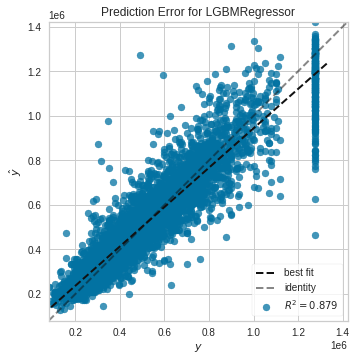

In [104]:
plot_model(best,plot='error') # Plotting the Error plot f the LGBM model

### Ensemble models: in summary ensemble models have performed well on training and validation sets. These models will be selected for further analysis with hypertuning and feature selection

# MODEL TUNING:


In [149]:
best

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=8106, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [152]:
# manual model

mlgbm=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=8106, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

mlgbm.fit(X_train_c, y_train)

print(mlgbm.score(X_train_c, y_train))

print(mlgbm.score(X_test_c, y_test))

0.9237243509067482
0.8874258997067698


In [153]:
# create pycaret model to tune

lightgbm_t = create_model('lightgbm')

# tune model
tuned_lgbm = tune_model(lightgbm_t)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,61869.59560,8164940033.01540,90360.05770,0.88820,0.16890,0.12660
1,59620.44290,7523834665.00180,86740.04070,0.90130,0.16140,0.12080
2,62289.81350,7889273296.97400,88821.58130,0.89010,0.17370,0.13250
3,60749.90840,7722374785.07860,87877.04360,0.89280,0.16560,0.12470
4,61425.72260,8143759972.61770,90242.78350,0.89070,0.17510,0.13340
5,62627.48510,8550845360.40420,92470.78110,0.89300,0.17260,0.13060
6,59684.43870,7646595403.96700,87444.81350,0.90710,0.16860,0.12780
7,62221.41440,7790169100.74040,88261.93460,0.89070,0.17550,0.13620
8,62191.55120,8366481016.33430,91468.47010,0.88990,0.16750,0.12600


In [155]:
# for test data on tuned model
predict_model(tuned_lgbm,data=test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,62301.07910,8463050040.07060,91994.83700,0.88470,0.17910,0.13270


,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated,price,Label
7806,-1.50448,-1.42377,-0.66173,0.40786,-0.54654,-0.68263,-0.48481,-0.41895,1.15661,0.73665,1.00000,0,3,6,0,0,0,436000.00000,453332.23386
18737,-0.39894,1.77195,0.48576,1.39546,0.32642,0.59012,-0.48376,-0.39899,1.48332,-1.22294,2.00000,0,3,8,0,0,0,525000.00000,540081.42353
3163,-0.39894,-0.14548,-0.66173,-0.07797,1.59949,-0.65337,-0.62641,-0.55933,1.39502,-1.15537,2.00000,0,3,8,0,0,0,402000.00000,366083.35882
8588,-0.39894,0.49366,-0.66173,-1.83781,-0.47379,2.29737,-0.46241,-0.44781,0.31778,-1.15537,2.00000,0,3,7,0,0,0,254950.00000,287673.24867
11800,-0.39894,1.45238,-0.66173,0.81174,-1.16488,-0.66800,-0.63829,-0.56718,1.15661,-1.18916,3.00000,0,3,8,0,0,0,607500.00000,487033.47303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,0.70659,1.13280,1.18403,0.86975,-1.08486,-0.58023,-0.47903,-0.40290,-1.05967,2.12188,2.00000,0,3,8,0,0,1,855000.00000,903313.67102
16169,0.70659,0.49366,-0.66173,-1.39549,1.44672,0.23902,-0.49912,-0.45134,-1.13031,-1.32430,2.00000,0,3,7,0,0,0,340000.00000,320759.36807
17919,-1.50448,-0.46505,-0.66173,-1.27730,-0.73568,-0.97522,-0.53175,-0.42838,1.20959,-0.24315,1.00000,0,4,8,0,0,0,210000.00000,249394.59103
18957,-0.39894,0.49366,-0.66173,0.49124,0.91567,0.80956,0.06001,-0.13631,1.48332,-0.14179,2.00000,0,4,9,0,1,0,645000.00000,691836.91333


### FEATURE ENGINEERING

In [105]:
## Feature importance

model = GradientBoostingRegressor(n_estimators = 200, learning_rate = 0.1, random_state=22)
model.fit(X_train, y_train)
feature_importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': feature_importances}).sort_values(by=['Importance'], ascending=False)
feat_imp_df['Percent Importance'] = round(feat_imp_df['Importance']*100,3)
feat_imp_df['Cumulative'] = np.cumsum(feat_imp_df['Importance']*100)
feat_imp_df.reset_index(drop=True, inplace=True)
display(feat_imp_df)
list_of_features = list(feat_imp_df['Feature']) # we keep the list handy

,Feature,Importance,Percent Importance,Cumulative
0,quality,0.36990,36.99000,36.98960
1,lat,0.25772,25.77200,62.76169
2,living_measure15,0.09656,9.65600,72.41732
3,furnished,0.07291,7.29100,79.70791
4,room_bath,0.04976,4.97600,84.68430
5,yr_built_diff,0.04202,4.20200,88.88583
6,long,0.03069,3.06900,91.95442
7,sight,0.02530,2.53000,94.48439
8,total_area,0.01768,1.76800,96.25276
9,room_bed,0.00909,0.90900,97.16150


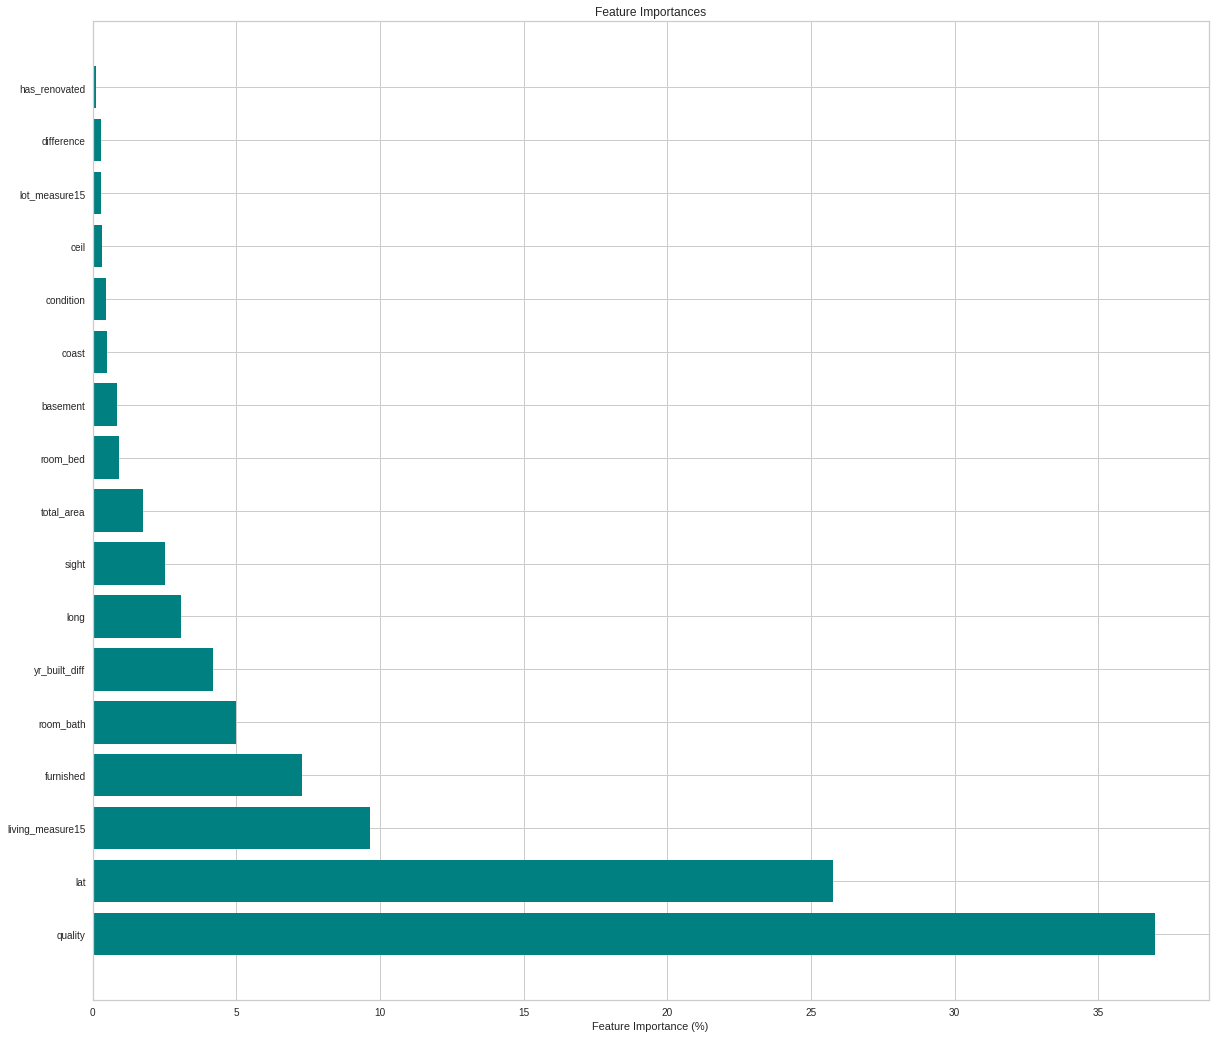

In [106]:
# Let's see some graphing

plt.figure(figsize=(20,18))
plt.title('Feature Importances')
plt.barh(feat_imp_df['Feature'], feat_imp_df['Percent Importance'], color='teal', align='center')
plt.xlabel('Feature Importance (%)')
plt.show()

# PCA


In [107]:
X_train

,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated
11512,0.69143,-1.45356,-0.65790,-1.60679,0.63469,-0.85528,2.92215,2.78594,0.73016,0.10428,1.00000,0,3,5,0,0,0
11076,-1.50927,-1.45356,-0.65790,0.86292,-0.99624,-0.59282,-0.50841,-0.49607,-0.35843,2.15093,1.50000,0,4,6,0,0,0
4979,-1.50927,-1.45356,-0.20414,1.00205,-0.99624,0.20913,-0.40004,-0.42880,1.32313,1.02527,1.00000,0,4,7,0,0,0
11468,-0.40892,0.50187,-0.65790,-1.09569,-0.00074,0.15080,-0.03932,-0.18917,-0.41153,-0.68027,2.00000,0,3,8,0,0,0
21044,0.69143,1.80550,1.97390,0.47004,1.20658,1.50682,-0.26039,-0.02163,0.63281,-0.64616,2.00000,0,3,9,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12026,1.79179,0.50187,-0.65790,-0.10449,0.20401,1.20063,-0.44730,-0.39548,-1.42046,-1.22605,2.00000,0,3,9,0,1,0
18839,-0.40892,-0.80175,-0.65790,-0.40798,-0.37493,-0.15539,-0.17448,-0.34619,0.86291,1.36638,1.50000,0,3,7,0,0,0
9485,-0.40892,-0.80175,-0.65790,-1.20454,-1.70227,-0.41785,2.92215,2.78594,-0.66819,-0.16861,1.00000,0,4,6,0,0,0
13657,0.69143,0.50187,-0.65790,0.21485,1.37602,0.37827,-0.47950,-0.44108,0.11064,-1.08960,2.00000,0,3,8,0,0,0


In [108]:
# GENERATING ALL PRINCIPAL COMPONENTS

pca = PCA(n_components=11) # For this dataset, there are 17 feature columns, so maximum number of principal components is 17
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [109]:
# The Eigenvectors
print(pca.components_)

[[ 2.85215965e-01  4.13831212e-01  1.16915104e-01  1.19269110e-03
   2.41374872e-01  4.28475489e-01  2.48704311e-01  2.62993894e-01
   2.18839881e-02 -2.98663479e-01  1.24361305e-01  1.00066018e-01
  -5.72031704e-02  4.71572602e-01  4.12999209e-03  1.41503524e-01
  -1.17084267e-03]
 [-2.47514692e-01 -2.61562666e-01 -2.53637649e-01 -2.30697718e-01
   3.11771564e-01 -4.39412818e-02  5.60688798e-01  5.33633278e-01
  -5.57331935e-03  3.16553777e-02 -8.67484727e-02 -6.45874704e-02
   1.35677603e-02 -2.00285612e-01  1.66235372e-03 -3.81940009e-02
  -3.04755383e-03]
 [ 1.54208096e-01 -4.31972692e-02  5.42662452e-01  2.35842979e-01
  -3.07472790e-01  7.21041313e-02  2.55881143e-01  2.73485745e-01
   5.07796294e-02  5.07077450e-01 -1.86033349e-01  2.15754895e-01
   2.02559127e-01 -3.91301388e-02  9.91873248e-03 -1.16942976e-03
   2.67482169e-02]
 [ 3.09921437e-01  8.77209775e-02  2.59394993e-01 -6.48673608e-01
   4.84403713e-02 -6.04928646e-02 -5.22633384e-02 -3.94474321e-02
  -5.86069288e-01 -

In [110]:
# The Eigenvalues 
print(pca.explained_variance_)

[3.72489621 1.75262242 1.58155555 1.03468935 0.98191276 0.74667898
 0.61380775 0.57380726 0.41079512 0.35515916 0.27591734]


In [111]:
# So what is the total variance?
print('Total Variance', sum(pca.explained_variance_))

Total Variance 12.051841906598996


In [112]:
# But what we really need is how the individual Principal Components contribute to this total variance

total_var = sum(pca.explained_variance_)

for i, v in enumerate(pca.explained_variance_, start=1):
    print(f'Variance explained by PC[{i}]: {100*v/total_var:.2f} %')
    

Variance explained by PC[1]: 30.91 %
Variance explained by PC[2]: 14.54 %
Variance explained by PC[3]: 13.12 %
Variance explained by PC[4]: 8.59 %
Variance explained by PC[5]: 8.15 %
Variance explained by PC[6]: 6.20 %
Variance explained by PC[7]: 5.09 %
Variance explained by PC[8]: 4.76 %
Variance explained by PC[9]: 3.41 %
Variance explained by PC[10]: 2.95 %
Variance explained by PC[11]: 2.29 %


In [113]:
pca.explained_variance_ratio_

array([0.29364533, 0.13816476, 0.12467902, 0.08156783, 0.07740728,
       0.05886306, 0.0483884 , 0.04523504, 0.03238428, 0.02799832,
       0.02175144])

In [114]:
# Let's take a look at the cumulative explained variance

print('PERCENTAGE OF VARIANCE EXPLAINED BY EACH EIGENVECTOR')
var_exp = []
for v in pca.explained_variance_ratio_:
    var_exp.append(v*100)
var_exp_df = pd.DataFrame(data = var_exp, columns = ['Variation Explained'], index = range(1,12))
var_exp_df['Cumulative Variance Explained'] = var_exp_df['Variation Explained'].cumsum()
var_exp_df.round(2)

PERCENTAGE OF VARIANCE EXPLAINED BY EACH EIGENVECTOR


,Variation Explained,Cumulative Variance Explained
1,29.36000,29.36000
2,13.82000,43.18000
3,12.47000,55.65000
4,8.16000,63.81000
5,7.74000,71.55000
6,5.89000,77.43000
7,4.84000,82.27000
8,4.52000,86.80000
9,3.24000,90.03000
10,2.80000,92.83000


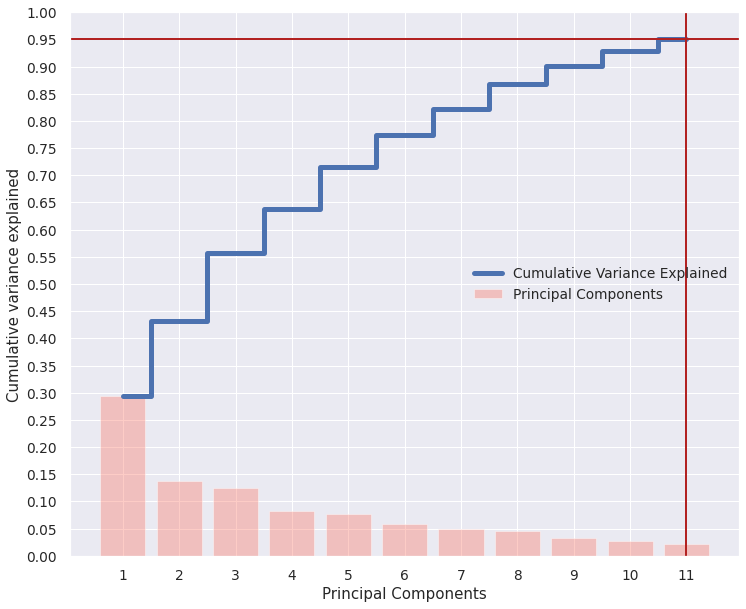

In [115]:
# Visualize this information

number_of_features = 18
dim_range = list(range(1,12))
sns.set(font_scale=1.25)  

fig = plt.figure(figsize = (12,10))

# Plotting the pink blocks
plt.bar(dim_range,pca.explained_variance_ratio_,
        color= 'salmon',
        alpha=0.4,
        align='center',
        label='Principal Components')
plt.ylabel('Variance explained')
plt.xlabel('Eigen Value')

# Plotting the blue steps
plt.step(dim_range,var_exp_df['Cumulative Variance Explained']/100,
         where='mid',
         lw = 5,
         label='Cumulative Variance Explained')
plt.ylabel('Cumulative variance explained')
plt.xlabel('Principal Components')

# Plotting the red crosshairs
plt.axvline(x = 11, lw = 2, ls = '-', c = 'firebrick')
plt.axhline(y = 0.95, lw = 2, ls = '-', c = 'firebrick')

plt.xticks(dim_range)
plt.yticks([(i/100) for i in range(0,101,5)])
plt.legend(loc = 'center right')
plt.show()

In [116]:
# PREPARING FOR 17 PRINCIPAL COMPONENTS
pca14 = PCA(n_components=17) # create the PCA object
pca14.fit(X_train)   # fit it
X_train_pca14 = pca14.transform(X_train) # transform the train
X_test_pca14 = pca14.transform(X_test)  # transform the test

In [117]:
#modelPCA=GradientBoostingRegressor()
modelPCA = LGBMRegressor()
modelPCA.fit(X_train_pca14, y_train)
preds_test  = modelPCA.predict(X_test_pca14)
preds_train = modelPCA.predict(X_train_pca14)
# checking the accuracy

print('ACCURACY')
print(f'    TRAIN: {100*modelPCA.score(X_train_pca14, y_train):.2f} %')
print(f'    TEST: {100*modelPCA.score(X_test_pca14, y_test):.2f} %')

ACCURACY
    TRAIN: 87.18 %
    TEST: 80.39 %


## PCA with 17 features doesnt help much as we get low train score of 87.1 % and test score of 80.3%

# Hyper parameter tuning using Grid search

In [118]:
# Trying Grid search CV

# We will try to improve the performance of the model using Hyperparameter tuning with grid search


params = {
    'max_depth':        [25],
    'min_samples_leaf': [40],
    'n_estimators':     [50]
}

model = GridSearchCV(
                        estimator=LGBMRegressor(random_state=3516),
                        param_grid=params,
                        cv=5,
                        n_jobs=-1,
                        verbose=1,
                    )

model.fit(X_train, y_train)
print(model.best_params_)
print("\nGridsearch LGB TRAIN score", model.score(X_train, y_train))
print("\nTest score", model.score(X_test, y_test))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
{'max_depth': 25, 'min_samples_leaf': 40, 'n_estimators': 50}

Gridsearch LGB TRAIN score 0.9006120935498406

Test score 0.8776601419075054


# The Grid search has improved the train score upto 90%. This is a significant difference as a result of hyper paramter tuning.

In [119]:
print("Test score", model.score(X_test, y_test))

Test score 0.8776601419075054


## The test score is 87.7% ,though its a little less copared to the base model test score. Lets see if this core improves with Randomized search

In [120]:
np.random.seed(42)
param_distributions = [{'max_depth':        np.random.randint(low = 5, high = 100, size = 500),
                        'min_samples_leaf': np.random.randint(low = 3, high = 25, size = 50),
                        'n_estimators':     np.random.randint(low = 10, high = 1000, size = 1000),
                       }]
model = RandomizedSearchCV(
                        estimator=LGBMRegressor(),
                        param_distributions=param_distributions,
                        cv=5,
                        n_iter=20,
                        n_jobs=-1,
                        verbose=5,
                        random_state=3516
                    )

model.fit(X_train, y_train)
print(model.best_params_)

print("\nTrain score", model.score(X_train, y_train))
print("\nTest score", model.score(X_test, y_test))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.8min finished


[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
{'n_estimators': 382, 'min_samples_leaf': 21, 'max_depth': 84}

Train score 0.9593480691181975

Test score 0.8932110281723136


In [121]:
# To check best parameters

model.best_estimator_


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=84,
              min_child_samples=20, min_child_weight=0.001, min_samples_leaf=21,
              min_split_gain=0.0, n_estimators=382, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

## With Random serach CV ,we were able to improve the test score upto 89.3%
## The Best params are {'n_estimators': 382, 'min_samples_leaf': 21, 'max_depth': 84}


As we can see above model gives us Train score 0.95 & Test score 0.89

so its kind of overfitting will try to make it best fit using different techniques

###Using Polynomial Features

In [122]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=84,
              min_child_samples=20, min_child_weight=0.001, min_samples_leaf=21,
              min_split_gain=0.0, n_estimators=382, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)



poly_clf.fit(X_train2, y_train)

print('ACCURACY')
print(f'    TRAIN: {100*poly_clf.score(X_train2, y_train):.2f} %')
print(f'    TEST: {100*poly_clf.score(X_test2, y_test):.2f} %')

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
ACCURACY
    TRAIN: 97.20 %
    TEST: 89.10 %


###It becomes more overfitted.

###Will try to reduce few feature to get best fit

##Will apply regularization techniques

###1. Lasso

In [123]:
lasso_n = Lasso(alpha=0.1)
lasso_n.fit(X_train2,y_train)
print ("Lasso model:", (lasso_n.coef_))

li_c=lasso_n.coef_


Lasso model: [ 0.00000000e+00 -4.09846369e+04 -7.45467243e+04  1.23471551e+04
 -5.97850548e+04  6.25369107e+04 -1.59749732e+05  2.40436428e+04
  1.15996765e+04 -2.32413951e+04 -5.01811389e+04  3.37566218e+04
 -1.89149011e+04  2.16508588e+04  8.27157726e+04  7.72264837e+05
 -7.30181736e+04  2.37077474e+04  2.56274708e+03 -3.04581615e+03
  1.78594490e+03  2.34103504e+03 -1.84497702e+03  2.89773016e+03
 -3.43529344e+03  6.27933721e+02  7.84372503e+03  1.16377027e+04
 -4.25133409e+03 -1.92896395e+03  4.83970851e+03  4.66462848e+03
  1.50164585e+04 -8.62148420e+03 -8.26141210e+03  6.33218789e+03
 -9.86336589e+02 -9.72242934e+03 -1.07356328e+02  4.49478253e+02
 -5.65662078e+03 -1.35412016e+04 -2.57517714e+04 -8.70996951e+03
 -4.19066589e+00  1.93109455e+04  9.11338880e+03  1.47809545e+04
  1.15905429e+04  6.85350442e+02 -5.64401193e+03  2.19331523e+03
  6.68061262e+01 -3.77523936e+03  1.14970079e+03 -5.23552297e+03
  1.66630987e+04  3.81619341e+03  3.91313539e+03 -4.07848607e+03
 -4.21865288

In [124]:
print('ACCURACY')
print(f'    TRAIN: {100*lasso_n.score(X_train2, y_train):.2f} %')
print(f'    TEST: {100*lasso_n.score(X_test2, y_test):.2f} %')

ACCURACY
    TRAIN: 77.35 %
    TEST: 77.02 %


### After applying Lasso we are getting very less score, hence we are discarding this

###Will try to apply 2nd Regularizing technique i.e Ridge

In [125]:
ridge_n = Ridge(alpha=0.5)
ridge_n.fit(X_train2,y_train)
print ("Ridge model:", (ridge_n.coef_))

Ridge model: [ 0.00000000e+00 -2.88692299e+04 -2.38508895e+04  1.65734234e+04
 -4.84741754e+04  8.29048051e+04 -1.68417820e+05  2.71757188e+04
  4.54992919e+03 -2.21668602e+04 -3.65709825e+04 -1.14755368e+04
 -9.42944947e+03 -8.73585447e+03  6.12300818e+04  3.26662067e+05
 -1.44967307e+05 -1.46587798e+03  2.92296091e+03 -2.97722784e+03
  1.94059432e+03  2.16003395e+03 -1.33473961e+03  3.32067809e+03
 -3.78132475e+03  5.62595668e+02  7.30315226e+03  1.27650487e+04
 -4.09034301e+03 -1.15161736e+03  2.58107234e+03  1.78161979e+03
  1.81915937e+04 -8.59623945e+03 -7.59260397e+03  7.24649686e+03
 -3.60901441e+02 -8.97562513e+03 -3.17506391e+02  6.73425594e+02
 -5.50554416e+03 -1.37548244e+04 -2.68479168e+04 -8.42544719e+03
 -3.80032309e+03  1.44640712e+04  1.26419801e+03  2.16611042e+04
  1.16101196e+04  5.32119794e+02 -5.44322148e+03  2.02993323e+03
  3.63740007e+00 -3.64892337e+03  1.14066544e+03 -5.15321708e+03
  1.66570507e+04  3.73235888e+03  4.59709495e+03 -4.98841377e+03
 -3.95337682

In [126]:
print('ACCURACY')
print(f'    TRAIN: {100*ridge_n.score(X_train2, y_train):.2f} %')
print(f'    TEST: {100*ridge_n.score(X_test2, y_test):.2f} %')

ACCURACY
    TRAIN: 77.37 %
    TEST: 77.08 %


###Here also we are getting very less score, this also we will discard

###Applying PCA

In [127]:
#As we have test score 89 so will go with 92 and check how many features it returns

pca_p = PCA(0.92) # create the PCA object
pca_p.fit(X_train2)   # fit it
X_train_pp = pca_p.transform(X_train2) # transform the train
X_test_pp = pca_p.transform(X_test2) 

In [128]:
pca_p.n_components_

13

Only 13 features gives us 92% R square in train data, will check R square on test data

In [129]:

modelPCA_pp = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=84,
              min_child_samples=20, min_child_weight=0.001, min_samples_leaf=21,
              min_split_gain=0.0, n_estimators=382, n_jobs=-1, num_leaves=31,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
modelPCA_pp.fit(X_train_pp, y_train)

# checking the accuracy

print('ACCURACY')
print(f'    TRAIN: {100*modelPCA_pp.score(X_train_pp, y_train):.2f} %')
print(f'    TEST: {100*modelPCA_pp.score(X_test_pp, y_test):.2f} %')

[LightGBM] [Warning] min_data_in_leaf is set with min_samples_leaf=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
ACCURACY
    TRAIN: 93.57 %
    TEST: 81.41 %


### This PCA gives very bad score for test data, hence we are discarding PCA model

##As the Regularization techniques, polynomial ,PCA are not improving the scores and causing an overfit situation still we are going with our Hypertuned model with Random search result

###train score=95%
###test score=89%

In [130]:
best

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=8106, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

#Saving model

In [131]:
pickle.dump(best,open('/content/drive/My Drive/Colab Notebooks/Capstone GL/house_model.pkl', 'wb'))

#Loading model

In [132]:
house_model=pickle.load(open('/content/drive/My Drive/Colab Notebooks/Capstone GL/house_model.pkl','rb'))

#Testing model

In [133]:
# Will take input from user:
ip=X_train_c.iloc[:1,:]
ip

ip1=ip

,room_bed,room_bath,basement,lat,long,living_measure15,lot_measure15,total_area,difference,yr_built_diff,ceil,sight,condition,quality,coast,furnished,has_renovated
11512,0.69143,-1.45356,-0.65790,-1.60679,0.63469,-0.85528,2.92215,2.78594,0.73016,0.10428,1.00000,0,3,5,0,0,0


In [148]:
print('Price of house:')
op=predict_model(house_model, data=ip)['Label']

print(op.values[0])

Price of house:
201160.82347205913


# Final Summary and conclusion:
## 1.The **ensemble models** have performed well compared to that of linear,KNN,SVR models
##2.The best performance is given by Gradient boosting model with training (score-**0.88**) and  Testing(score-**0.89**)
##3.The top key features that drive the price of the property are: **'Quality', 'Latitude', 'living_measure15','furnished', 'room_bath', 'yr_built_diff', 'Longitude', 'sight', 'total_area'**.
###The above data is also reinforced by the analysis done during bivariate analysis.
##4.Also we tried Hyper paramter tuning using Grid search and Random search CV Grid search yielded **90%** on Traing data and **87%** on Test data
## 5. Further upon using Random search CV , TRain result score improved to **95%** and test score **89**%
## 6. We have also tried the Regularization techniques like Ridge, Lasso ,ploynomial feature and PCA inorder to avoid overfitting.

#So, one needs to thoroughly introspect its property on parameters suggested and list its price accordingly, similarly if one wants buy house - needs to check the features suggested above in house and calculate the predicted price. The same can than be compared to listed price.
